<img src="assets/logo.jpg" alt="logo" width="150" height="80" style="float: left; margin-right: 10px;">

<br><br><br>

<h1><center>Final Deliverable - Artificial Intelligence (Machine Learning)</center></h1>
<br><br><br>

<center><img src="./assets/ai.png" alt="map" width="500" height="400"></center>
<br><br><br>

Delphin Bonheur NGOGA - Nell PATOU PARVEDY - Clément MARQUES - Joel Stephane YANKAM NGUEGUIM


## 1. Introduction
HumanForYou is a pharmaceutical company based in India, employing around 4,000 people. Each year, the company faces a high employee turnover rate of approximately 15%, which causes significant challenges: the projects on which departing employees were working fall behind schedule, damaging the company’s reputation with customers and partners. 
Furthermore, this turnover requires maintaining a large human resources team to recruit, train, and onboard new employees, leading to increased costs and productivity loss.


In this context, management has requested an in-depth analysis of the available data to identify the main factors influencing turnover. The goal is to propose predictive models to guide actions that will motivate employees to stay. This project relies on analyzing several anonymized datasets containing demographic, professional, satisfaction, and performance information about employees.


Alongside technical and operational challenges, adopting an ethical approach is essential. The use of artificial intelligence and predictive analytics in human resources raises sensitive issues related to personal data protection, prevention of discrimination, transparency of models, and preservation of individual autonomy. Respecting these principles is crucial to building trust and ensuring that the solution does not negatively impact employees’ quality of work life or fundamental rights.


## 2. Data supplied
The data supplied by HumanForYou comprises several anonymized CSV files, each providing distinct but complementary information for the turnover analysis:

<br>
•	General Human Resources Data (general_data.csv)

This file contains key demographic and professional attributes for each employee identified by a unique EmployeeID for the year 2015. This comprehensive dataset forms the backbone for understanding employee profiles.

<br>
•	Latest Manager Assessment (manager_survey_data.csv)

This smaller file contains each employee’s latest evaluation by their manager as of February 2015. It includes ratings for job involvement (from low to very high) and overall performance (from low to beyond expectations). These assessments provide insights into individual engagement and productivity levels as viewed by direct supervisors.

<br>
•	Workplace Quality of Life Survey (employee_survey_data.csv)

Collected in June 2015, this survey gathers employee feedback on three dimensions of job satisfaction: satisfaction with the work environment, the job itself, and work-life balance. This dataset helps capture subjective factors influencing morale and retention.

<br>
•	Working Hours Data (in_out_time.zip)

Two files within this archive record employee arrival and departure times daily throughout 2015. This time clock data allows analysis of working patterns and potential correlations between attendance behavior and attrition, offering a fine-grained temporal perspective on employee engagement.
Together, these anonymized datasets provide a multi-dimensional view of employees, combining objective HR data, managerial evaluations, subjective satisfaction measures, and actual attendance records in 2015, and the turnover outcome relates to departures in 2016. This rich data environment enables a thorough exploration of factors impacting turnover at HumanForYou.

<br><br>

## 3. Data loading and preparation

### 3.1 Data import

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### 3.2 Loading data

Here we display the first 5 rows of each file:

In [ ]:
# Load dataset
general_data = pd.read_csv('general_data.csv')

# Display the first lines of the dataset
general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

In [ ]:
employee_survey_data = pd.read_csv('employee_survey_data.csv')
employee_survey_data.head()


EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [ ]:
manager_survey_data = pd.read_csv('manager_survey_data.csv')
manager_survey_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [ ]:
intime = pd.read_csv('in_time.csv')
intime.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29  ...   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26  ...   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22  ...   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 09:55:29  2015-12-22 10:04:06   
1  2015-12-18 10:37:17  2015-12-21 09:49:02  2015-12-22 10:33:51   
2  2015-12-18 10:15:14  2015-12-21 10:10:28  2015-12-22 09:44:44   
3  2015-12-18 10:17:38  2015-12-21 09:58:21  2015-12-22 10:04:25   
4  2015-12-18 09:58:35  2015-12-21 10:03:41  2015-12-22 10:10:30   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 10:14:27  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41   
1  2015-12-23 10:12:10                  NaN        NaN  2015-12-28 09:31:45   
2  2015-12-23 10:15:54  2015-12-24 10:07:26        NaN  2015-12-28 09:42:05   
3  2015-12-23 10:11:46  2015-12-24 09:43:15        NaN  2015-12-28 09:52:44   
4  2015-12-23 10:13:36  2015-12-24 09:44:24        NaN  2015-12-28 10:05:15   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 10:03:36  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-29 09:55:49  2015-12-30 10:32:25  2015-12-31 09:27:20  
2  2015-12-29 09:43:36  2015-12-30 09:34:05  2015-12-31 10:28:39  
3  2015-12-29 09:33:16  2015-12-30 10:18:12  2015-12-31 10:01:15  
4  2015-12-29 10:30:53  2015-12-30 09:18:21  2015-12-31 09:41:09  

[5 rows x 262 columns]

In [ ]:
outtime = pd.read_csv('out_time.csv')
outtime.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13  ...   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25  ...   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45  ...   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
1  2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
2  2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
3  2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
4  2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 16:44:44  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
1  2015-12-23 17:38:18                  NaN        NaN  2015-12-28 17:08:38   
2  2015-12-23 16:59:43  2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
3  2015-12-23 17:36:35  2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
4  2015-12-23 18:00:49  2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
2  2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
3  2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
4  2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 262 columns]

### Merge Datasets

In [ ]:
# 1. Sélection STRICTE des colonnes numériques
employee_num = employee_survey_data.select_dtypes(include="number")

# 2. Comptage des valeurs manquantes (NaN) uniquement sur les colonnes numériques
missing_per_column = employee_num.isna().sum()

print("Valeurs manquantes par colonne numérique :")
print(missing_per_column)

# 3. Nombre total de valeurs manquantes numériques
total_missing = missing_per_column.sum()
print(f"\nNombre total de valeurs manquantes (numériques) : {total_missing}")

# 4. Imputation par la médiane
imputer = SimpleImputer(strategy="median")
employee_num_imputed_array = imputer.fit_transform(employee_num)

# 5. Reconstruction du DataFrame en conservant index et colonnes
employee_num_imputed = pd.DataFrame(
    employee_num_imputed_array,
    columns=employee_num.columns,
    index=employee_survey_data.index
)

# 6. Vérification post-imputation
print("\nValeurs manquantes après imputation :")
print(employee_num_imputed.isna().sum())

# 1. Sélection STRICTE des colonnes numériques
manager_num = manager_survey_data.select_dtypes(include="number")

# 2. Comptage des valeurs manquantes (NaN) uniquement sur les colonnes numériques
missing_per_column = manager_num.isna().sum()

print("Valeurs manquantes par colonne numérique :")
print(missing_per_column)

# 3. Nombre total de valeurs manquantes numériques
total_missing = missing_per_column.sum()
print(f"\nNombre total de valeurs manquantes (numériques) : {total_missing}")

# 4. Imputation par la médiane
imputer = SimpleImputer(strategy="median")
manager_num_imputed_array = imputer.fit_transform(manager_num)

# 5. Reconstruction du DataFrame en conservant index et colonnes
manager_num_imputed = pd.DataFrame(
    manager_num_imputed_array,
    columns=manager_num.columns,
    index=manager_survey_data.index
)

# 6. Vérification post-imputation
print("\nValeurs manquantes après imputation :")
print(manager_num_imputed.isna().sum())

# 1. Update survey data with imputed values to ensure consistency
employee_survey_data[employee_num_imputed.columns] = employee_num_imputed
manager_survey_data[manager_num_imputed.columns] = manager_num_imputed

# 2. Re-merge the datasets (now general_data already has binned columns and no originals)
data = pd.merge(general_data, manager_survey_data, on='EmployeeID')
data = pd.merge(data, employee_survey_data, on='EmployeeID')

# 3. Create feature set X and target vector y
# Only drop Attrition and EmployeeID — the original columns are already removed
X = data.drop(columns=["Attrition", "EmployeeID"])
y = data["Attrition"].astype(str).str.strip().map({"No": 0, "Yes": 1}).astype(int)

# Verify binned features are present
print(f"Binned features in X: {[c for c in X.columns if 'Group' in c or 'Level' in c]}")
X.shape, y.shape

Valeurs manquantes par colonne numérique :
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

Nombre total de valeurs manquantes (numériques) : 83

Valeurs manquantes après imputation :
EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64
Valeurs manquantes par colonne numérique :
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

Nombre total de valeurs manquantes (numériques) : 0

Valeurs manquantes après imputation :
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64
Binned features in X: ['JobLevel', 'StockOptionLevel']


((4410, 27), (4410,))

## Data preparation
### 1. handling missing values

In [ ]:

# 1. Sélection STRICTE des colonnes numériques
general_num = general_data.select_dtypes(include="number")

# 2. Comptage des valeurs manquantes (NaN) uniquement sur les colonnes numériques
missing_per_column = general_num.isna().sum()

print("Valeurs manquantes par colonne numérique :")
print(missing_per_column)

# 3. Nombre total de valeurs manquantes numériques
total_missing = missing_per_column.sum()
print(f"\nNombre total de valeurs manquantes (numériques) : {total_missing}")

# 4. Imputation par la médiane
imputer = SimpleImputer(strategy="median")
general_num_imputed_array = imputer.fit_transform(general_num)

# 5. Reconstruction du DataFrame en conservant index et colonnes
general_num_imputed = pd.DataFrame(
    general_num_imputed_array,
    columns=general_num.columns,
    index=general_data.index
)

# 6. Vérification post-imputation
print("\nValeurs manquantes après imputation :")
print(general_num_imputed.isna().sum())

Valeurs manquantes par colonne numérique :
Age                         0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeID                  0
JobLevel                    0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Nombre total de valeurs manquantes (numériques) : 28

Valeurs manquantes après imputation :
Age                        0
DistanceFromHome           0
Education                  0
EmployeeCount              0
EmployeeID                 0
JobLevel                   0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear  

In [ ]:
# 1. Sélection STRICTE des colonnes numériques
employee_num = employee_survey_data.select_dtypes(include="number")

# 2. Comptage des valeurs manquantes (NaN) uniquement sur les colonnes numériques
missing_per_column = employee_num.isna().sum()

print("Valeurs manquantes par colonne numérique :")
print(missing_per_column)

# 3. Nombre total de valeurs manquantes numériques
total_missing = missing_per_column.sum()
print(f"\nNombre total de valeurs manquantes (numériques) : {total_missing}")

# 4. Imputation par la médiane
imputer = SimpleImputer(strategy="median")
employee_num_imputed_array = imputer.fit_transform(employee_num)

# 5. Reconstruction du DataFrame en conservant index et colonnes
employee_num_imputed = pd.DataFrame(
    employee_num_imputed_array,
    columns=employee_num.columns,
    index=employee_survey_data.index
)

# 6. Vérification post-imputation
print("\nValeurs manquantes après imputation :")
print(employee_num_imputed.isna().sum())


Valeurs manquantes par colonne numérique :
EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

Nombre total de valeurs manquantes (numériques) : 0

Valeurs manquantes après imputation :
EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64


In [ ]:
# 1. Sélection STRICTE des colonnes numériques
manager_num = manager_survey_data.select_dtypes(include="number")

# 2. Comptage des valeurs manquantes (NaN) uniquement sur les colonnes numériques
missing_per_column = manager_num.isna().sum()

print("Valeurs manquantes par colonne numérique :")
print(missing_per_column)

# 3. Nombre total de valeurs manquantes numériques
total_missing = missing_per_column.sum()
print(f"\nNombre total de valeurs manquantes (numériques) : {total_missing}")

# 4. Imputation par la médiane
imputer = SimpleImputer(strategy="median")
manager_num_imputed_array = imputer.fit_transform(manager_num)

# 5. Reconstruction du DataFrame en conservant index et colonnes
manager_num_imputed = pd.DataFrame(
    manager_num_imputed_array,
    columns=manager_num.columns,
    index=manager_survey_data.index
)

# 6. Vérification post-imputation
print("\nValeurs manquantes après imputation :")
print(manager_num_imputed.isna().sum())


Valeurs manquantes par colonne numérique :
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

Nombre total de valeurs manquantes (numériques) : 0

Valeurs manquantes après imputation :
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64


In [ ]:
# Remove columns with more than 50% missing values
threshold = 0.5
intime_cleaned = intime.loc[:, intime.isnull().mean() < threshold]

print(f"Columns before: {intime.shape[1]}")
print(f"Columns after: {intime_cleaned.shape[1]}")

# Display missing values for remaining columns
print("\nMissing values in remaining columns:")
print(intime_cleaned.isnull().sum())

Columns before: 262
Columns after: 250

Missing values in remaining columns:
Unnamed: 0      0
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
             ... 
2015-12-24    250
2015-12-28    234
2015-12-29    230
2015-12-30    265
2015-12-31    213
Length: 250, dtype: int64


In [ ]:
# Remove columns with more than 50% missing values
threshold = 0.5
outtime_cleaned = outtime.loc[:, outtime.isnull().mean() < threshold]

print(f"Columns before: {outtime.shape[1]}")
print(f"Columns after: {outtime_cleaned.shape[1]}")

# Display missing values for remaining columns
print("\nMissing values in remaining columns:")
print(outtime_cleaned.isnull().sum())

Columns before: 262
Columns after: 250

Missing values in remaining columns:
Unnamed: 0      0
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
             ... 
2015-12-24    250
2015-12-28    234
2015-12-29    230
2015-12-30    265
2015-12-31    213
Length: 250, dtype: int64


### 1.5. Variable Binning

Transformation of continuous variables into categorical groups to improve exploitability and interpretation.

In [ ]:
# Update general_data with imputed values to ensure no missing values for binning
general_data[general_num_imputed.columns] = general_num_imputed

# 1. Age Groups
general_data['AgeGroup'] = pd.cut(
    general_data['Age'], 
    bins=[18, 26, 36, 46, 56, 120], 
    labels=['18-25', '26-35', '36-45', '46-55', '55+'], 
    right=False
).astype('object')

# 2. Distance Groups
general_data['DistanceGroup'] = pd.cut(
    general_data['DistanceFromHome'], 
    bins=[0, 6, 11, 21, 100], 
    labels=['Close (0-5)', 'Moderate (6-10)', 'Far (11-20)', 'Very Far (20+)'], 
    right=False
).astype('object')

# 3. Income Groups
general_data['IncomeGroup'] = pd.qcut(
    general_data['MonthlyIncome'], 
    q=4, 
    labels=['Income_Low', 'Income_Medium', 'Income_High', 'Income_VeryHigh']
).astype('object')

# 4. Job Tenure Groups
general_data['TenureGroup'] = pd.cut(
    general_data['YearsAtCompany'], 
    bins=[0, 2, 6, 11, 100], 
    labels=['New (0-1)', 'Stabilized (2-5)', 'Experienced (6-10)', 'Veteran (11+)'], 
    right=False
).astype('object')

# 5. Experience Level
general_data['ExperienceLevel'] = pd.cut(
    general_data['TotalWorkingYears'], 
    bins=[0, 3, 6, 11, 100], 
    labels=['Junior (0-2)', 'Intermediate (3-5)', 'Senior (6-10)', 'Expert (11+)'], 
    right=False
).astype('object')

# === NEW: Drop the original continuous columns that were binned ===
original_columns_to_drop = [
    'Age', 
    'DistanceFromHome', 
    'MonthlyIncome', 
    'YearsAtCompany', 
    'TotalWorkingYears'
]

general_data.drop(columns=original_columns_to_drop, inplace=True)

print("New categorical variables added: AgeGroup, DistanceGroup, IncomeGroup, TenureGroup, ExperienceLevel")
print("Original continuous columns dropped:", original_columns_to_drop)
general_data[['AgeGroup', 'DistanceGroup', 'IncomeGroup', 'TenureGroup', 'ExperienceLevel']].head()

New categorical variables added: AgeGroup, DistanceGroup, IncomeGroup, TenureGroup, ExperienceLevel
Original continuous columns dropped: ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears']


AgeGroup    DistanceGroup      IncomeGroup         TenureGroup  \
0    46-55  Moderate (6-10)  Income_VeryHigh           New (0-1)   
1    26-35  Moderate (6-10)    Income_Medium    Stabilized (2-5)   
2    26-35      Far (11-20)  Income_VeryHigh    Stabilized (2-5)   
3    36-45      Close (0-5)      Income_High  Experienced (6-10)   
4    26-35  Moderate (6-10)       Income_Low  Experienced (6-10)   

      ExperienceLevel  
0        Junior (0-2)  
1       Senior (6-10)  
2  Intermediate (3-5)  
3        Expert (11+)  
4       Senior (6-10)

### 2. Encoding categorical variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Select category columns
general_cat = general_data.select_dtypes(include=[object])

# 2. Encoder (dense array)
cat_encoder = OneHotEncoder(sparse_output=False)  # ou sparse=False si version plus ancienne

# 3. Fit and Transform
general_cat_encoded_array = cat_encoder.fit_transform(general_cat)

# 4. Convertir en entiers (0/1 au lieu de 0.0/1.0)
general_cat_encoded_array = general_cat_encoded_array.astype(int)

# 5. Get the Feature Names
feature_names = cat_encoder.get_feature_names_out(general_cat.columns)

# 6. DataFrame final
general_cat_encoded = pd.DataFrame(general_cat_encoded_array, columns=feature_names)

general_cat_encoded.head()

# Créer la nouvelle colonne Attrition
general_cat_encoded["Attrition"] = general_cat_encoded["Attrition_Yes"]
general_cat_encoded["Gender"] = general_cat_encoded["Gender_Female"]

# Optionnel : supprimer les colonnes one-hot d'origine
general_cat_encoded.drop(
    columns=["Attrition_No", "Attrition_Yes", "Over18_Y", "Gender_Female","Gender_Male" ], #on vire Over18 car déductible depuis la variable age
    inplace=True
)

general_cat_encoded.head()

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 1   
3                          1                                 0   
4                          0                                 0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                             1                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             1                           0   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             1   
4                               0                             0   

   EducationField_Marketing  EducationField_Medical  ...  \
0                         0                       0  ...   
1                         0                       0  ...   
2                         0                       0  ...   
3                         0                       0  ...   
4                         0                       1  ...   

   TenureGroup_Experienced (6-10)  TenureGroup_New (0-1)  \
0                               0                      1   
1                               0                      0   
2                               0                      0   
3                               1                      0   
4                               1                      0   

   TenureGroup_Stabilized (2-5)  TenureGroup_Veteran (11+)  \
0                             0                          0   
1                             1                          0   
2                             1                          0   
3                             0                          0   
4                             0                          0   

   ExperienceLevel_Expert (11+)  ExperienceLevel_Intermediate (3-5)  \
0                             0                                   0   
1                             0                                   0   
2                             0                                   1   
3                             1                                   0   
4                             0                                   0   

   ExperienceLevel_Junior (0-2)  ExperienceLevel_Senior (6-10)  Attrition  \
0                             1                              0          0   
1                             0                              1          1   
2                             0                              0          0   
3                             0                              0          0   
4                             0                              1          0   

   Gender  
0       1  
1       1  
2       0  
3       0  
4       0  

[5 rows x 47 columns]

### 3. Data normalization

In [ ]:
# Standardizing numeric columns
scaler = StandardScaler()
general_num_scaled = pd.DataFrame(scaler.fit_transform(general_num_imputed), columns=general_num_imputed.columns)

# Verification of standardization
general_num_scaled.head()


Age  DistanceFromHome  Education  EmployeeCount  EmployeeID  JobLevel  \
0  1.541369         -0.393938  -0.891688            0.0   -1.731658 -0.961486   
1 -0.648668          0.099639  -1.868426            0.0   -1.730873 -0.961486   
2 -0.539166          0.963398   1.061787            0.0   -1.730087  1.749610   
3  0.117845         -0.887515   2.038524            0.0   -1.729302  0.845911   
4 -0.539166          0.099639  -1.868426            0.0   -1.728516 -0.961486   

   MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
0       1.405136           -0.678464          -1.150554            0.0   
1      -0.491661           -1.079486           2.129306            0.0   
2       2.725053           -0.678464          -0.057267            0.0   
3       0.386301            0.123580          -1.150554            0.0   
4      -0.884109            0.524602          -0.877232            0.0   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0         -0.932014          -1.322079               2.483396       -0.981014   
1          0.241988          -0.678877               0.155707       -0.327893   
2          2.589994          -0.807517              -0.620189       -0.327893   
3          2.589994           0.221606               1.707500        0.161947   
4          1.415991          -0.292956              -0.620189       -0.164613   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -0.679146             -1.155935  
1                -0.368715             -0.034520  
2                -0.679146             -0.314873  
3                 1.493867              0.245834  
4                -0.679146             -0.034520

<center><img src="assets/standardization.png" alt="map" width="650" height="250"></center>
<br><br><br>

In [ ]:
scaler = StandardScaler()
employee_num_scaled = pd.DataFrame(scaler.fit_transform(employee_num_imputed), columns=employee_num_imputed.columns)

employee_num_scaled.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0   -1.731658                 0.252200         1.156302        -1.085336
1   -1.730873                 0.252200        -0.663899         1.757749
2   -1.730087                -0.665460        -0.663899        -2.506879
3   -1.729302                 1.169861         1.156302         0.336206
4   -1.728516                 1.169861        -1.573999         0.336206

In [ ]:
scaler = StandardScaler()
manager_num_scaled = pd.DataFrame(scaler.fit_transform(manager_num_imputed), columns=manager_num_imputed.columns)

manager_num_scaled.head()

EmployeeID  JobInvolvement  PerformanceRating
0   -1.731658        0.379672          -0.426230
1   -1.730873       -1.026167           2.346151
2   -1.730087        0.379672          -0.426230
3   -1.729302       -1.026167          -0.426230
4   -1.728516        0.379672          -0.426230

At this point, we loaded and prepared our datasets for analysis. We have imputed missing values, encoded categorical variables and normalized numerical variables. The data is now ready for the modeling and classification phase.

## Data Exploration and Visualization

### 1. Analyzing descriptive statistics

Before diving into data visualization, let's take a look at descriptive statistics to get an initial idea of variable distributions.

In [ ]:
general_data.describe()


Education  EmployeeCount   EmployeeID     JobLevel  \
count  4410.000000         4410.0  4410.000000  4410.000000   
mean      2.912925            1.0  2205.500000     2.063946   
std       1.023933            0.0  1273.201673     1.106689   
min       1.000000            1.0     1.000000     1.000000   
25%       2.000000            1.0  1103.250000     1.000000   
50%       3.000000            1.0  2205.500000     2.000000   
75%       4.000000            1.0  3307.750000     3.000000   
max       5.000000            1.0  4410.000000     5.000000   

       NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
count         4410.000000        4410.000000         4410.0       4410.000000   
mean             2.691837          15.209524            8.0          0.793878   
std              2.493912           3.659108            0.0          0.851883   
min              0.000000          11.000000            8.0          0.000000   
25%              1.000000          12.000000            8.0          0.000000   
50%              2.000000          14.000000            8.0          1.000000   
75%              4.000000          18.000000            8.0          1.000000   
max              9.000000          25.000000            8.0          3.000000   

       TrainingTimesLastYear  YearsSinceLastPromotion  YearsWithCurrManager  
count            4410.000000              4410.000000           4410.000000  
mean                2.799320                 2.187755              4.123129  
std                 1.288978                 3.221699              3.567327  
min                 0.000000                 0.000000              0.000000  
25%                 2.000000                 0.000000              2.000000  
50%                 3.000000                 1.000000              3.000000  
75%                 3.000000                 3.000000              7.000000  
max                 6.000000                15.000000             17.000000

In [ ]:
employee_survey_data.describe()


EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
count  4410.000000              4410.000000      4410.000000      4410.000000
mean   2205.500000                 2.725170         2.729478         2.763492
std    1273.201673                 1.089852         1.098904         0.703541
min       1.000000                 1.000000         1.000000         1.000000
25%    1103.250000                 2.000000         2.000000         2.000000
50%    2205.500000                 3.000000         3.000000         3.000000
75%    3307.750000                 4.000000         4.000000         3.000000
max    4410.000000                 4.000000         4.000000         4.000000

In [ ]:
manager_survey_data.describe()


EmployeeID  JobInvolvement  PerformanceRating
count  4410.000000     4410.000000        4410.000000
mean   2205.500000        2.729932           3.153741
std    1273.201673        0.711400           0.360742
min       1.000000        1.000000           3.000000
25%    1103.250000        2.000000           3.000000
50%    2205.500000        3.000000           3.000000
75%    3307.750000        3.000000           3.000000
max    4410.000000        4.000000           4.000000

We can see that the dataset is complete for most variables (4,410 observations) but that the temporal variables (intime/outtime) are unusable. Outliers found, for example, in the MonthlyIncome column

### 2. Visualizing Numerical Variables
We'll start by visualizing the distributions of numerical variables to better understand their behavior.

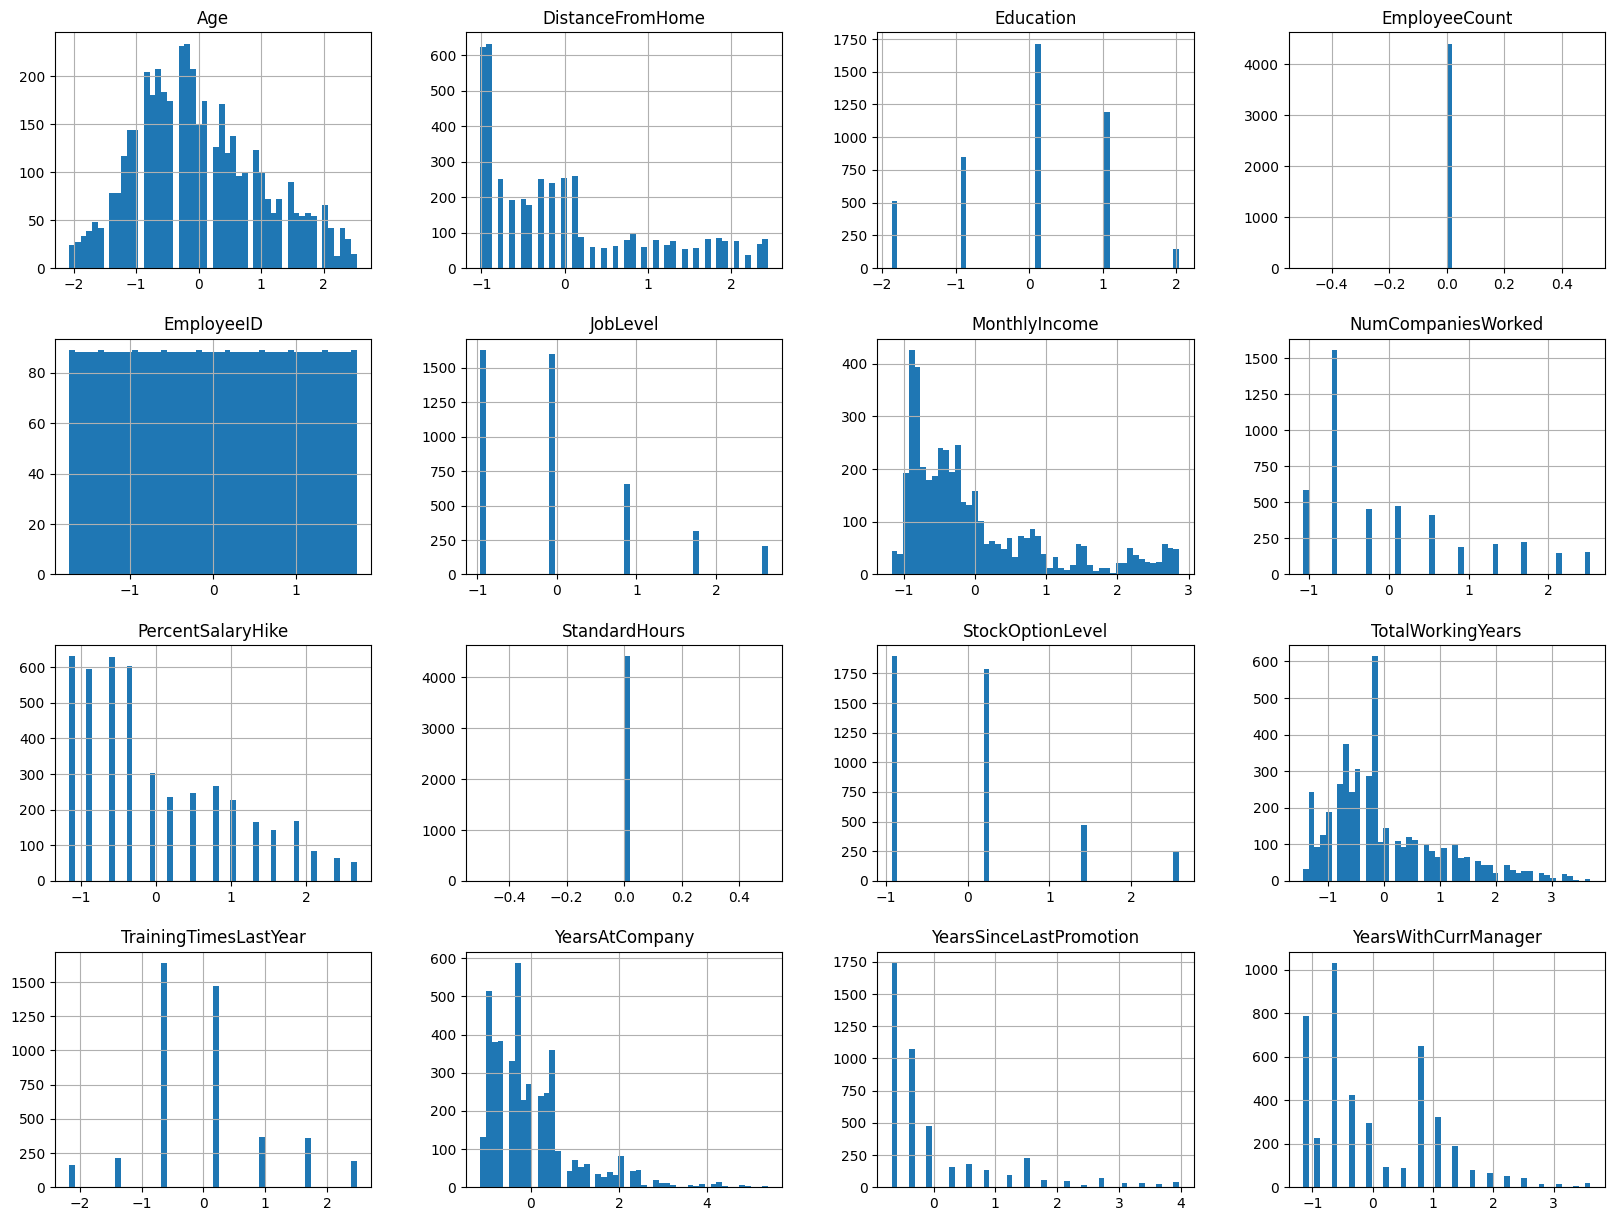

In [ ]:
import matplotlib.pyplot as plt

general_num_scaled.hist(bins=50, figsize=(20, 15))
plt.show()


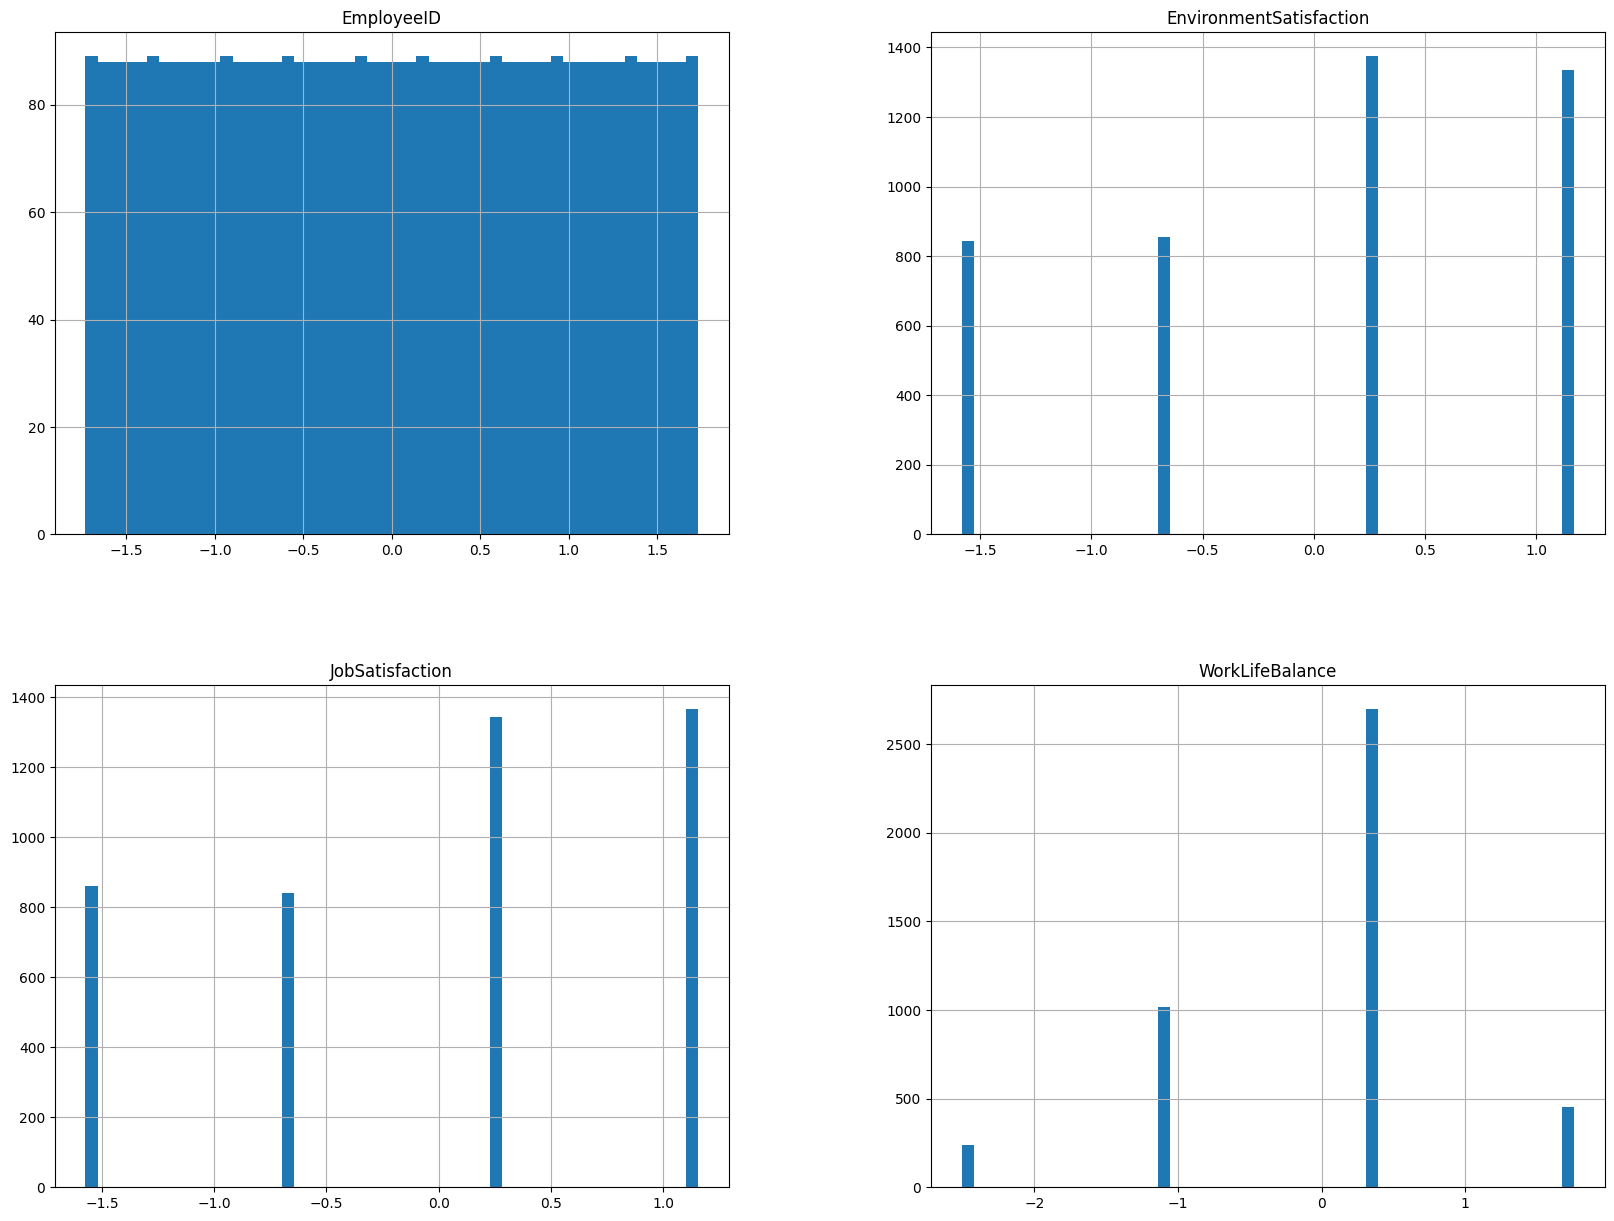

In [ ]:
import matplotlib.pyplot as plt

employee_num_scaled.hist(bins=50, figsize=(20, 15))
plt.show()

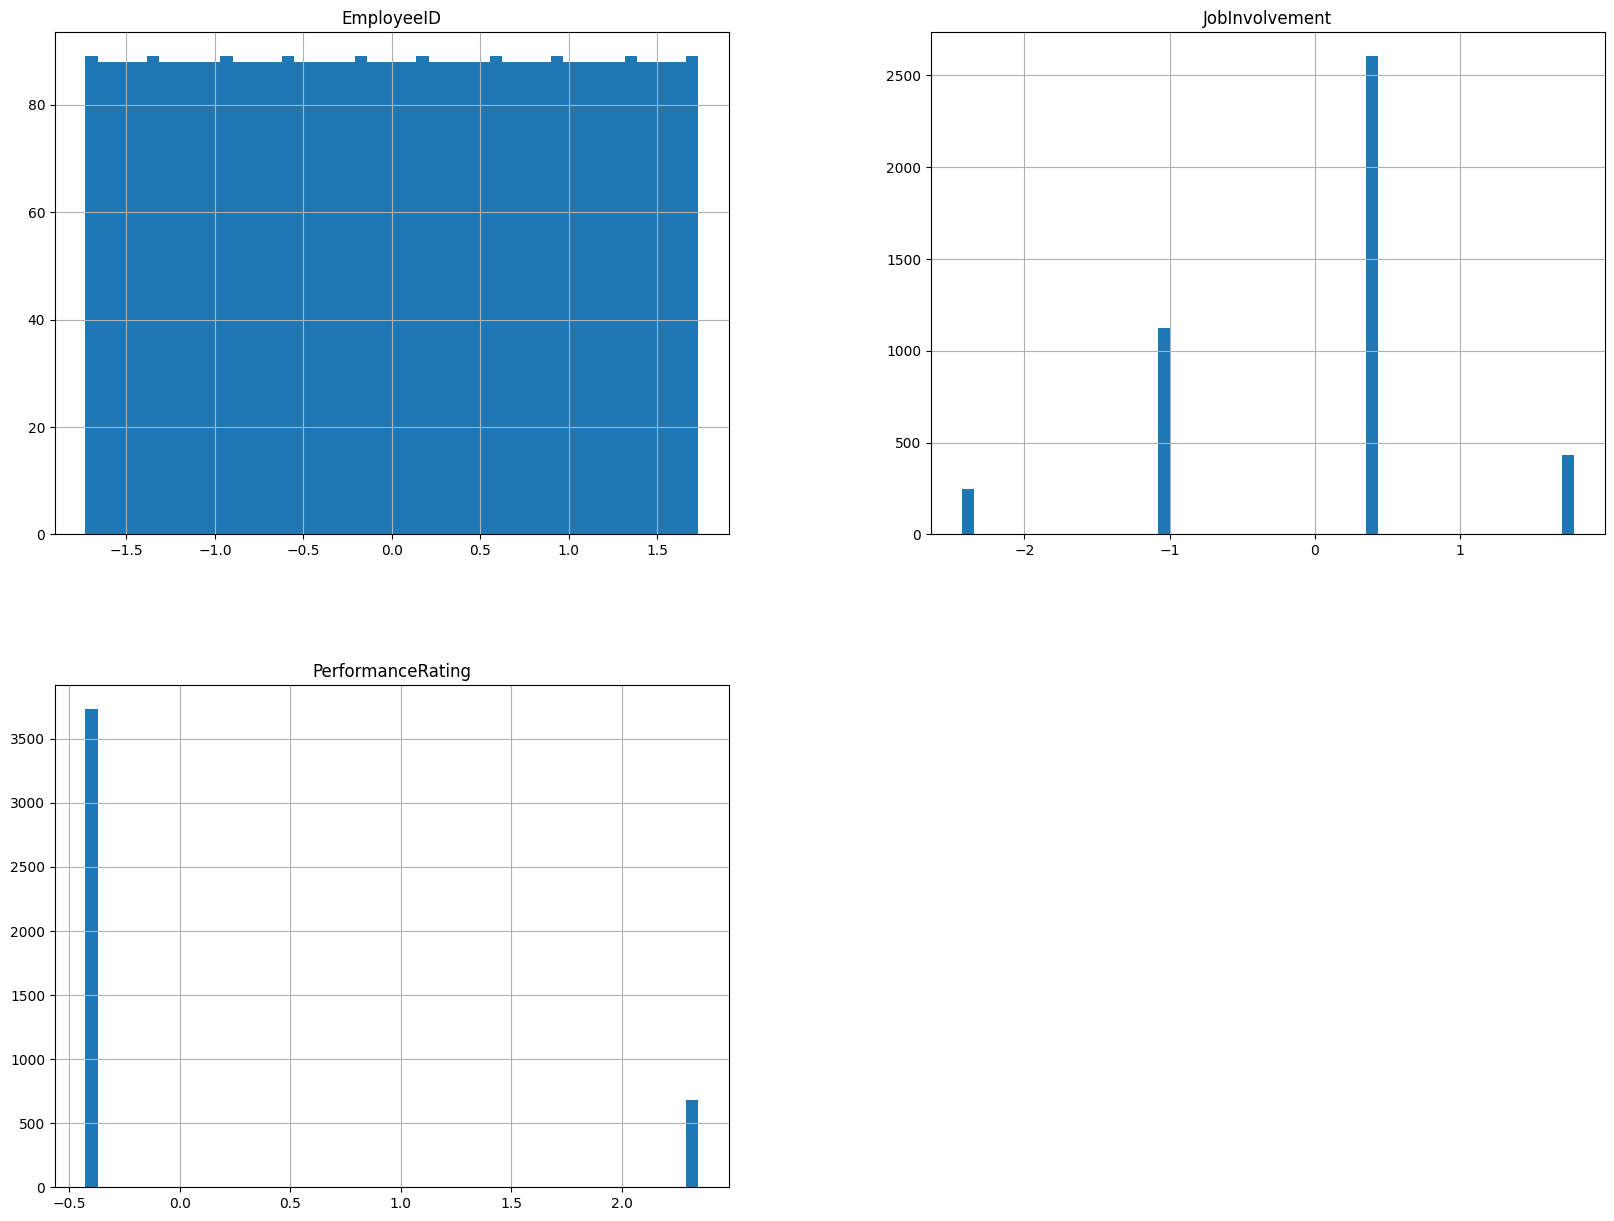

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

manager_num_scaled.hist(bins=50, figsize=(20, 15))
plt.show()

### 3. Correlation matrix
To explore the relationships between numerical variables, we use a correlation matrix and a heatmap.

In [ ]:
non_zero_std_cols = general_num_scaled.columns[general_num_scaled.std() != 0]
general_num_scaled_clean = general_num_scaled[non_zero_std_cols]

employee_num_scaled.drop(
    columns=["EmployeeID" ],
    inplace=True
)

manager_num_scaled.drop(
    columns=["EmployeeID" ],
    inplace=True
)

# 2. Concatenate numerical and categorical features
X = pd.concat(
    [general_num_scaled_clean, general_cat_encoded,employee_num_scaled, manager_num_scaled],
    axis=1
)

# 3. Correlation matrix (NUMERICAL FEATURES ONLY)
corr_matrix = X.corr()

# 4. Plot correlation heatmap
plt.figure(figsize=(40, 16))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True
)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.tight_layout()
plt.show()

### 4. Visualizing relationships between variables

We're going to create a few scatter plots to visualize the relationships between certain key variables.

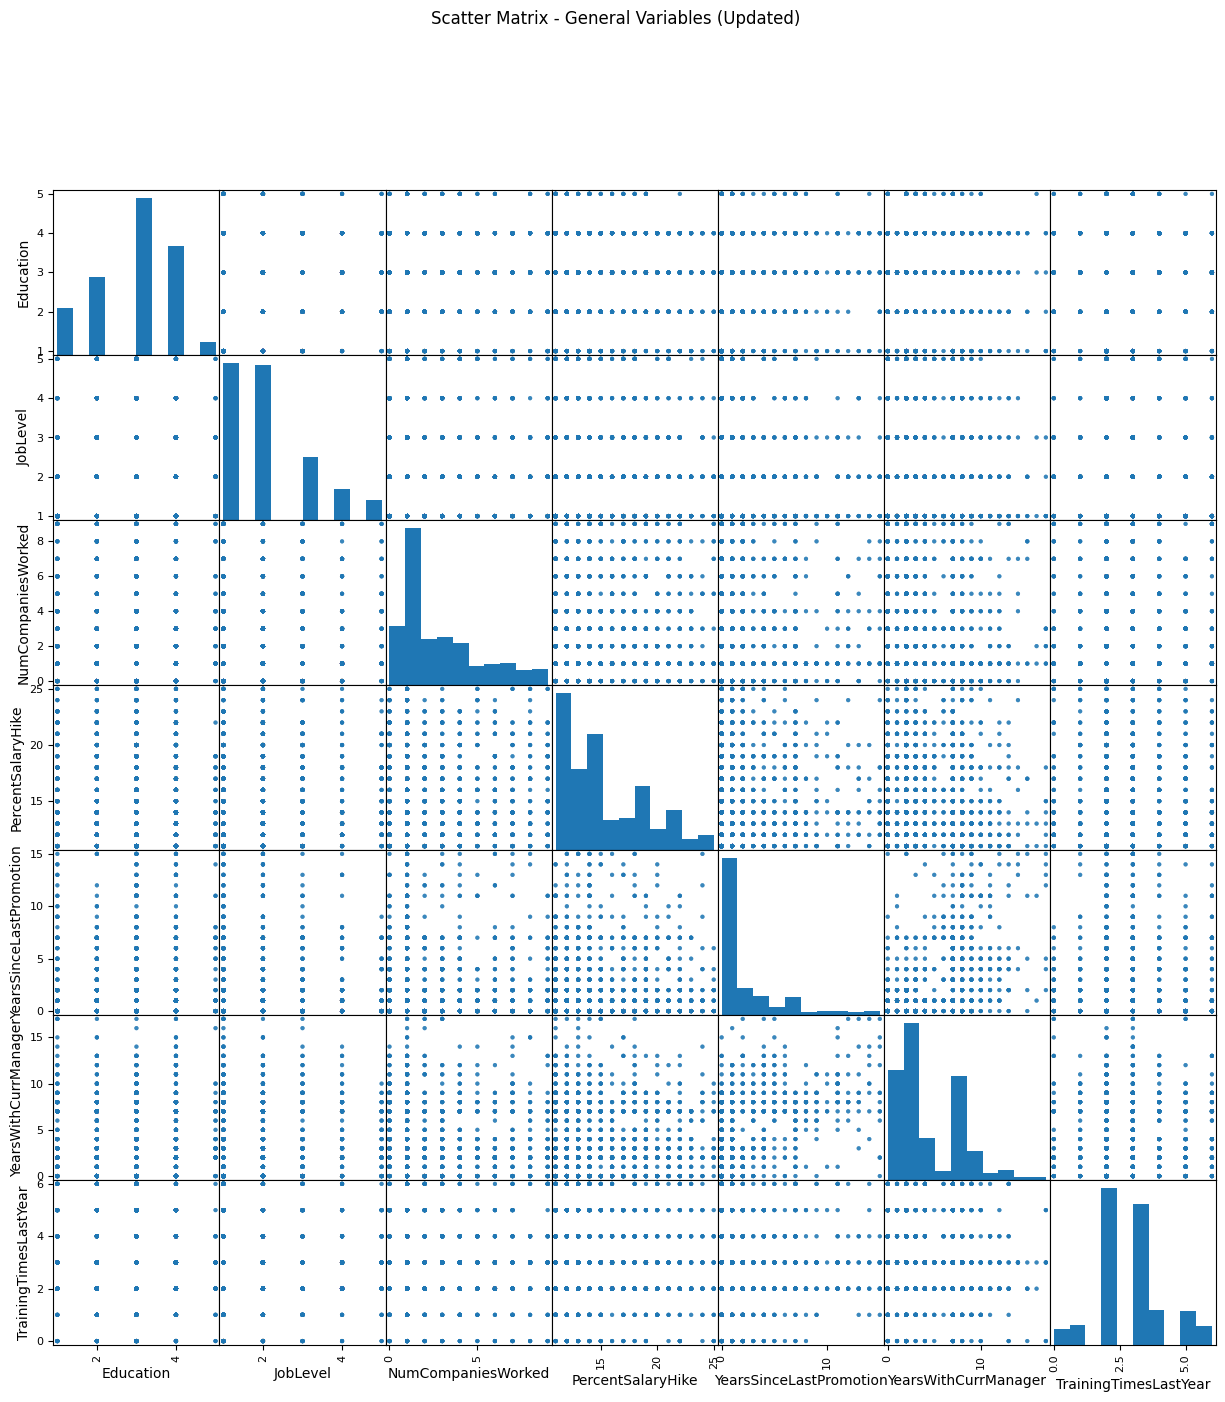

In [ ]:
# Updated attributes using remaining or new numerical/binned columns
# (Adjust based on what you still want to visualize)
attributes = [
    "Education",
    "JobLevel",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "TrainingTimesLastYear"
    # Add any other remaining numerical columns if desired
]

scatter_matrix = pd.plotting.scatter_matrix(
    general_data[attributes], 
    figsize=(15, 15),
    alpha=0.5,
    diagonal='hist' 
)
plt.suptitle('Scatter Matrix - General Variables (Updated)', y=1.0)
plt.show()

**Salary analysis**

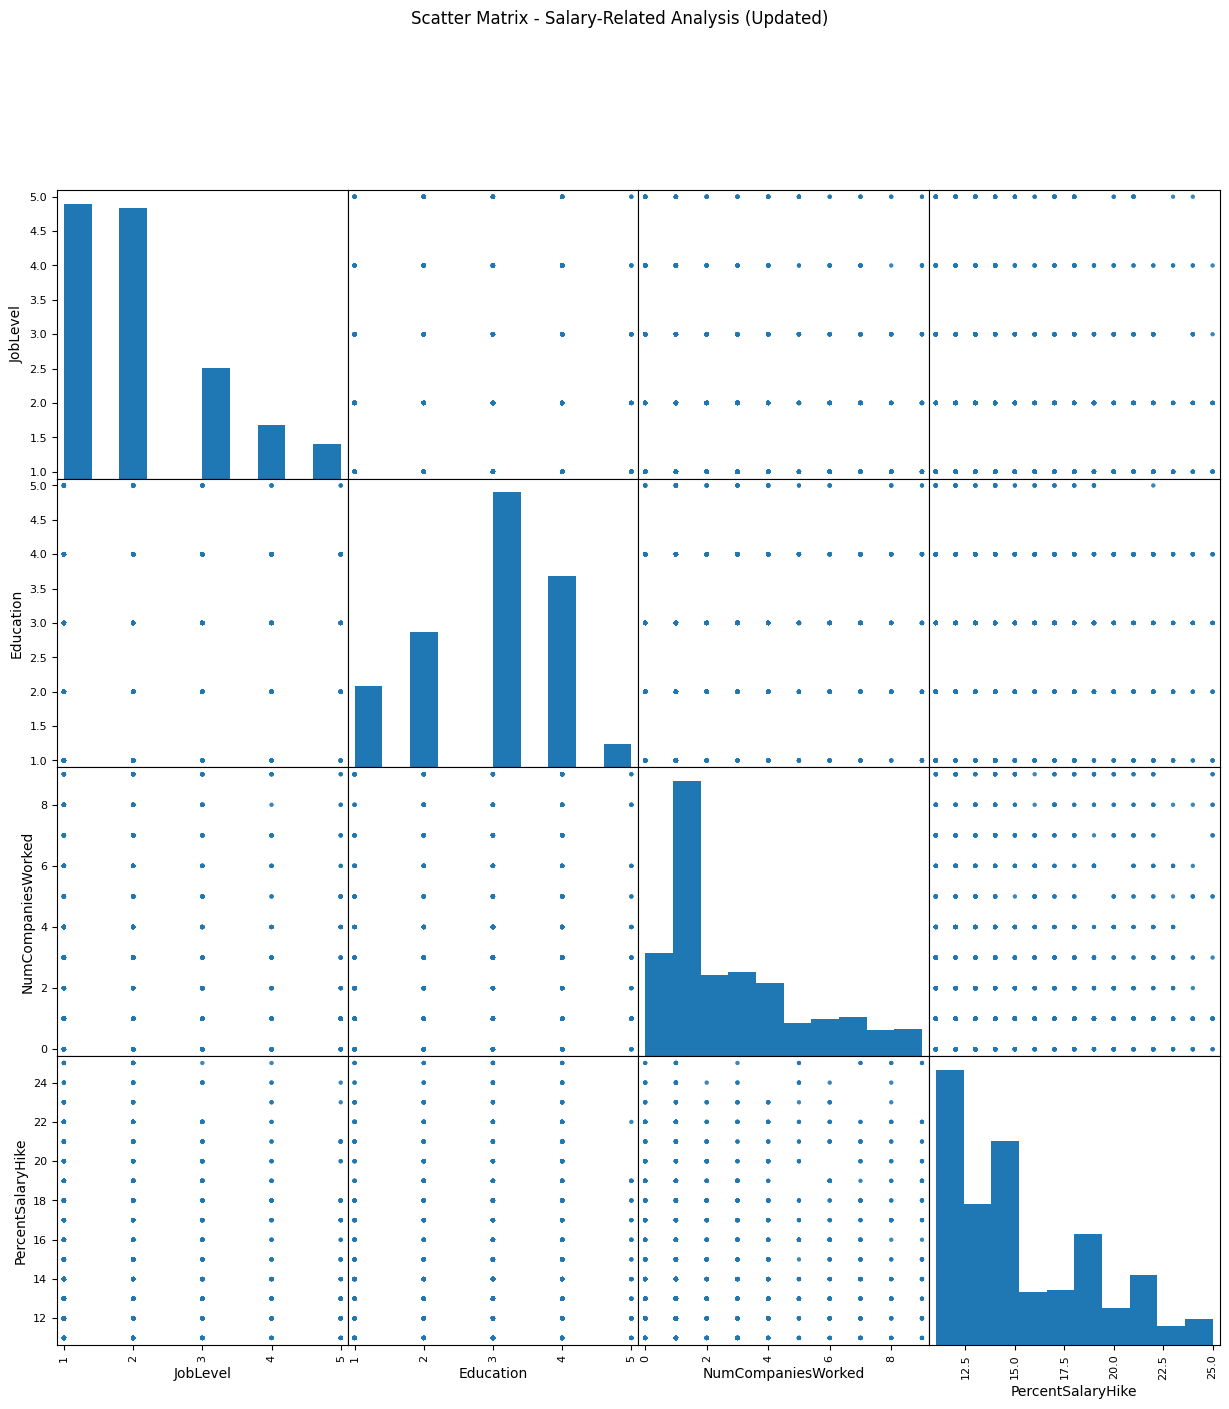

In [ ]:
# Since MonthlyIncome, TotalWorkingYears, YearsAtCompany are dropped
# Use proxies or remaining columns (e.g., JobLevel often correlates with income)
attributes = [
    "JobLevel",
    "Education",
    "NumCompaniesWorked",
    "PercentSalaryHike"
    # Add others if available
]

scatter_matrix = pd.plotting.scatter_matrix(
    general_data[attributes], 
    figsize=(15, 15),
    alpha=0.5,
    diagonal='hist' 
)
plt.suptitle('Scatter Matrix - Salary-Related Analysis (Updated)', y=1.0)
plt.show()

**Seniority Analysis**

In [ ]:
attributes = [
    "YearsWithCurrManager",
    "NumCompaniesWorked",
    "YearsSinceLastPromotion",
    "JobLevel",
    "TrainingTimesLastYear"
]

scatter_matrix = pd.plotting.scatter_matrix(
    general_data[attributes], 
    figsize=(15, 15),
    alpha=0.5,
    diagonal='hist' 
)
plt.suptitle('Scatter Matrix - Seniority Analysis (Updated)', y=1.0)
plt.show()

**Mobility Analysis**

In [ ]:
attributes = [
    "NumCompaniesWorked",
    "YearsWithCurrManager",      # still available
    "YearsSinceLastPromotion",   # still available
    "JobLevel",
    "PercentSalaryHike"
    # Removed: "YearsAtCompany", "Age", "DistanceFromHome"
]

scatter_matrix = pd.plotting.scatter_matrix(
    general_data[attributes], 
    figsize=(15, 15),
    alpha=0.5,
    diagonal='hist' 
)
plt.suptitle('Scatter Matrix - Mobility Analysis (Updated)', y=1.0)
plt.show()

**Satisfaction Analysis**

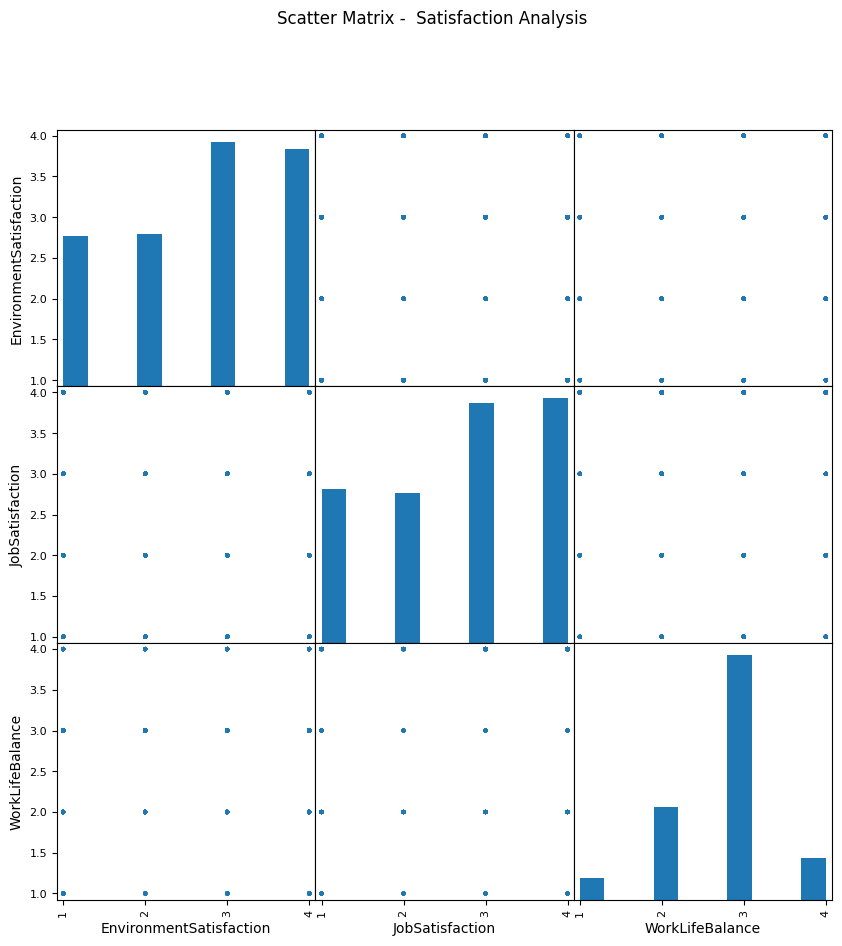

In [ ]:
attributes = [
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "WorkLifeBalance"
]

scatter_matrix = pd.plotting.scatter_matrix(
    employee_survey_data[attributes], 
    figsize=(10, 10),
    alpha=0.5
)
plt.suptitle('Scatter Matrix -  Satisfaction Analysis', y=1.0)
plt.show()


**Performance Analysis**

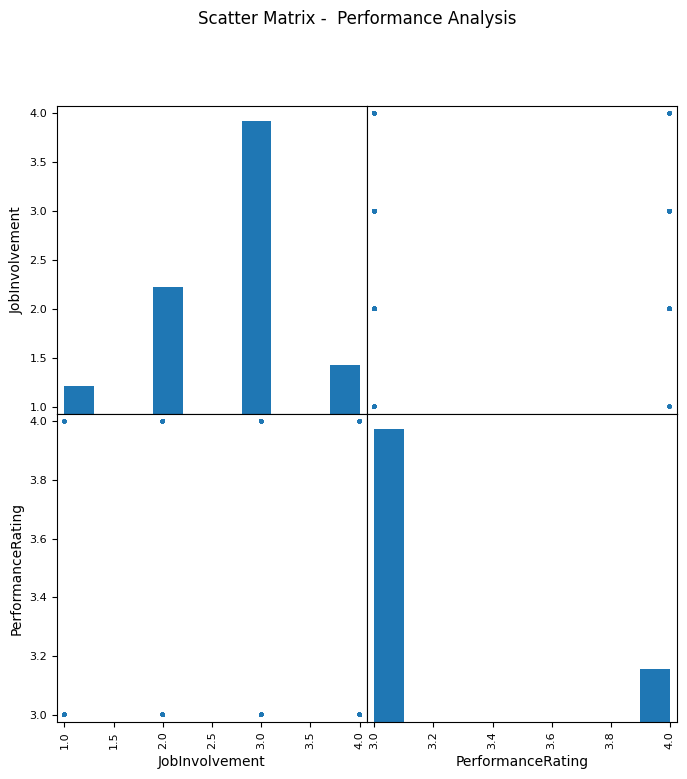

In [ ]:
attributes = [
    "JobInvolvement",
    "PerformanceRating"
]

scatter_matrix = pd.plotting.scatter_matrix(
    manager_survey_data[attributes], 
    figsize=(8, 8),
    alpha=0.5
)
plt.suptitle('Scatter Matrix -  Performance Analysis', y=1.0)
plt.show()

Do not include:
<br>
“EmployeeID” = Meaningless identifier
<br>
“EmployeeCount” = Constant (always 1)
<br>
“StandardHours” = Constant (always 8)
<br>
“StockOptionLevel” = Little variance, zero correlations

## 4. Ethics
### 1. Global ethical methodology

The approach adopted for this project is grounded in the principles of trustworthy artificial intelligence, as outlined by the European Commission’s Assessment List for Trustworthy Artificial Intelligence (ALTAI). These principles include respect for human autonomy, technical robustness and security, data privacy and governance, transparency, fairness and non-discrimination, societal well-being, and accountability.

<br>

### 2. Analysis According to ALTAI Ethical Requirements

The tool supports the actionability the key requirements outlined by the Assessment List for Trustworthy Artificial Intelligence, presented by the High-Level Expert Group on AIpresented to the European Commission, in April 2019. Despite our company not being in the EU, this document is an excellent base to build upon, given no Indian equivalent exists. The Ethics Guidelines introduces the concept of Trustworthy AI, based on seven key requirements:


- Human Autonomy and Oversight: AI systems should support human agency and human decision-making, as prescribed by the principle of respect for human autonomy. This includes training individuals to make informed choices, claim their fundamental rights, and ensuring appropriate oversight mechanisms.

- Technical Robustness and Safety: The AI systems must deliver systems that can be trusted and that are resilient. This implies the systems must be implemented with a preventative approach to limit potential unwanted harm and prevent it whenever it could happen.

- Data Privacy and Governance: To ensure trustworthy AI, robust protections for privacy and data quality must be in place throughout the system's lifecycle. This includes respecting data protection regulations (such as DPDP 2023, the Digital Personal Data Protection Act in India), implementing strong mechanisms for data collection, storage, and processing, minimizing data usage where possible, and ensuring high-quality, accurate, and relevant datasets to avoid errors or biases emergingfrom poor data management.

- Transparency: Everything should be traceable, explainable and there should be clear communications about the limitations of the system. This aims to build trust towards AI and to have a good comprehension of its whole way of working.

- Diversity, Non-Discrimination and Fairness: To achieve Trustworthy AI, we must have inclusion and diversity throughout the entire AI system. AI systems may suffer from the inclusion of inadvertent historic bias, incompleteness, and bad governance models. If handled poorly, those biases could lead to unintended direct or indirect prejudice against a certain group of people. We aim to avoid potential harm at any cost.

- Societal and Environmental Well-being: Trustworthy AI should contribute positively to society and the environment, promoting sustainable development and minimizing negative impacts. This involves assessing and addressing potential effects on employment, social cohesion, democracy, and ecological footprint.

- Accountability: Mechanisms must be established to ensure responsibility and accountability for AI systems and their outcomes, both before and after deployment. This includes clear allocation of responsibilities among developers, deployers, and users, auditability of processes and decisions, redress mechanisms for affected individuals, and regular risk assessments to enable traceability and remediation in case of harm.

<center><img src="ethic.png" alt="map" width="400" height="400"></center>

<br>

### 3. Removed features

According to the ALTAI, some data must be avoided or excluded prior to using them to train our model. This includes the following data, present in our dataset:

- Gender: This is potentially sensitive data if it reveals or infers sexual orientation. More broadly, it is a protected characteristic against discrimination. Using it can introduce discriminatory biases, violating ALTAI's non-discrimination principle

- Marital status: This data reveals aspects of private and family life. It can indirectly infer sensitive information.

- Education field: Depending on the field, it can reveal religious or philosophical beliefs or ethnic origin.

- Age: Using it in a predictive model can lead to ageist biases. ALTAI recommends minimising proxies for protected characteristics to avoid discrimination.

- Employee ID: Allows to directly identify an employee.


For efficiency in the handling of data, we also delete some useless fields of the data:

- Over18 is non-variable (always yes)
- Standard hours is always at 8 hours a day
- Employee count is always at 1.

## 5. Classification models
In this section, we will develop and evaluate multiple classification models to identify the best performer for our objectives. We will implement various algorithms, assess their performance using standard metrics, and compare results to select the optimal model.


### Reminder of the main performance metrics

Performance metrics are essential for assessing the effectiveness of classification models. Here's a reminder of the main metrics used:

#### 1. Accuracy
Accuracy is the ratio of the number of correct predictions to the total number of predictions.

$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$

#### 2. Precision
Precision is the ratio of true positives (TP) to the sum of true positives (TP) and false positives (FP).

$
\text{Precision} = \frac{TP}{TP + FP}
$

#### 3. Recall
Recall is the ratio of true positives (TP) to the sum of true positives (TP) and false negatives (FN).

$
\text{Recall} = \frac{TP}{TP + FN}
$

#### 4. F1-Score
The F1-score is the harmonic mean of precision and recall, providing a balance between the two.

$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$


### Confusion Matrix

The confusion matrix is a method of visualizing the performance of a classification model. It displays results in tabular form, with actual and predicted predictions. Its components are :

- **True Positives (TP)**: Number of times the positive class was correctly predicted.
- **False Positive (FP)**: Number of times the negative class was incorrectly predicted as positive.
- **True Negatives (TN)**: Number of times the negative class was correctly predicted.
- **False Negatives (FN)**: Number of times the positive class was incorrectly predicted as negative.

$
\begin{array}{|c|c|c|}
\hline
& \text{Predicted Positive} & \text{Predicted Negative} \\
\hline
\text{True Positive} & \text{TP} & \text{FN} \\
\hline
\text{True Negative} & \text{FP} & \text{TN} \\
\hline
\end{array}
$

<center><img src="assets/metrics.png" alt="map" width="550" height="400"></center>
<br><br><br>

### AUC and ROC curve

#### ROC curve (Receiver Operating Characteristic)

The ROC curve is a graph showing the performance of a classification model at different discrimination thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

- True Positive Rate (TPR)** : This is the recall.

$
TPR = \frac{TP}{TP + FN}
$

- False Positive Rate (FPR)** : This is the ratio of false positives to the sum of true negatives and false positives.

$
FPR = \frac{FP}{FP + TN}
$

#### AUC (Area Under the Curve)

AUC is the area under the ROC curve. It measures the model's ability to distinguish between positive and negative classes. An AUC of 1.0 indicates a perfect model, while an AUC of 0.5 indicates a model that does no better than random choice.

- **AUC interpretation** :
  - **0.9 - 1** : Excellent performance
  - **0.8 - 0.9** : Good performance
  - **0.7 - 0.8** : Acceptable performance
  - **0.6 - 0.7** : Poor performance
  - **0.5 - 0.6** : Very poor performance

ROC curves and AUC scores are valuable tools for comparing the performance of different classification models, particularly in situations where classes are unbalanced.

By using these metrics and tools, you can comprehensively assess the performance of your classification models and choose the one best suited to your problem.

## 1. Target variable and class balance

Before training any model, we analyze the target variable `Attrition`.
This step is critical because class imbalance strongly impacts:
- model behavior (e.g., a model may simply learn to always predict the majority class),
- the interpretation of performance metrics (e.g., accuracy can be misleading when one class dominates),
- the business conclusions we draw from the results (e.g., underestimating the number of employees at risk).

In our dataset, `Attrition` is a binary variable indicating whether an employee has left the organization (`Yes`) or not (`No`).
Understanding the proportion of each class (churned vs. retained employees) will guide the choice of appropriate evaluation metrics and, if necessary, techniques to handle imbalance (such as resampling or class weights).

## 6. Model application

### 0. Preparation of learning and test data


## 1. Feature matrix (X) and target vector (y)


We now construct the feature matrix `X` and the target vector `y` that will be used as inputs for the classification models.

- The **target variable** `y` corresponds to the column `Attrition`, which we convert into a binary numerical format:
  - `No` → `0` (the employee stayed),
  - `Yes` → `1` (the employee left).
- The **feature matrix** `X` contains all the explanatory variables used to predict attrition.
  We remove:
  - the target column `Attrition`, to avoid data leakage,
  - the column `EmployeeID`, which is an identifier and does not carry predictive information.

The corresponding code is:

In [ ]:
# 1. Update survey data with imputed values to ensure consistency
employee_survey_data[employee_num_imputed.columns] = employee_num_imputed
manager_survey_data[manager_num_imputed.columns] = manager_num_imputed

# 2. Re-merge the datasets (general_data already has binned columns and original cols dropped)
data = pd.merge(general_data, manager_survey_data, on='EmployeeID')
data = pd.merge(data, employee_survey_data, on='EmployeeID')

# 3. Create feature set X and target vector y
# Only drop Attrition and EmployeeID — original columns were already removed during binning
X = data.drop(columns=["Attrition", "EmployeeID"])
y = data["Attrition"].map({"No": 0, "Yes": 1}).astype(int)  # simplified mapping

# Verify binned features are present
print("Binned categorical features in X:", [col for col in X.columns if 'Group' in col or 'Level' in col])
print("Shape of X:", X.shape, "Shape of y:", y.shape)
X.head()

Binned categorical features in X: ['JobLevel', 'StockOptionLevel', 'AgeGroup', 'DistanceGroup', 'IncomeGroup', 'TenureGroup', 'ExperienceLevel']
Shape of X: (4410, 27) Shape of y: (4410,)


BusinessTravel              Department  Education EducationField  \
0      Travel_Rarely                   Sales        2.0  Life Sciences   
1  Travel_Frequently  Research & Development        1.0  Life Sciences   
2  Travel_Frequently  Research & Development        4.0          Other   
3         Non-Travel  Research & Development        5.0  Life Sciences   
4      Travel_Rarely  Research & Development        1.0        Medical   

   EmployeeCount  Gender  JobLevel                    JobRole MaritalStatus  \
0            1.0  Female       1.0  Healthcare Representative       Married   
1            1.0  Female       1.0         Research Scientist        Single   
2            1.0    Male       4.0            Sales Executive       Married   
3            1.0    Male       3.0            Human Resources       Married   
4            1.0    Male       1.0            Sales Executive        Single   

   NumCompaniesWorked  ... AgeGroup    DistanceGroup      IncomeGroup  \
0                 1.0  ...    46-55  Moderate (6-10)  Income_VeryHigh   
1                 0.0  ...    26-35  Moderate (6-10)    Income_Medium   
2                 1.0  ...    26-35      Far (11-20)  Income_VeryHigh   
3                 3.0  ...    36-45      Close (0-5)      Income_High   
4                 4.0  ...    26-35  Moderate (6-10)       Income_Low   

          TenureGroup     ExperienceLevel  JobInvolvement  PerformanceRating  \
0           New (0-1)        Junior (0-2)             3.0                3.0   
1    Stabilized (2-5)       Senior (6-10)             2.0                4.0   
2    Stabilized (2-5)  Intermediate (3-5)             3.0                3.0   
3  Experienced (6-10)        Expert (11+)             2.0                3.0   
4  Experienced (6-10)       Senior (6-10)             3.0                3.0   

  EnvironmentSatisfaction JobSatisfaction WorkLifeBalance  
0                     3.0             4.0             2.0  
1                     3.0             2.0             4.0  
2                     2.0             2.0             1.0  
3                     4.0             4.0             3.0  
4                     4.0             1.0             3.0  

[5 rows x 27 columns]

## 2. Train / Test split

- We split the dataset into training and test sets.
Stratification is used to preserve class imbalance proportions.
- We now split the dataset into a **training set** and a **test set** in order to evaluate our models on unseen data.

- The **training set** is used to fit (learn) the model parameters.
- The **test set** is kept aside and only used at the end to assess the generalization performance.

We use a **70/30 split** (`test_size=0.30`), meaning 70% of the data for training and 30% for testing.

To maintain the original class distribution of `Attrition` in both subsets, we enable **stratification** with `stratify=y`.
This is particularly important when the target variable is imbalanced, as it ensures that both the training and test sets reflect the same proportion of positive and negative cases.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((3087, 27), (1323, 27))

## 3) Show imbalance (counts + % + plot)
- We first inspect the distribution of the target variable `Attrition` to quantify the class imbalance.

- **Counts** tell us how many employees belong to each class (`No` vs. `Yes`).
- **Percentages** indicate the relative frequency of each class in the dataset.
- A **bar plot** visually highlights how skewed the classes are.

The following code computes and displays these elements:

Class counts (Attrition):
Attrition
0    3699
1     711
Name: count, dtype: int64

Class percentages (%):
Attrition
0    83.88
1    16.12
Name: count, dtype: float64


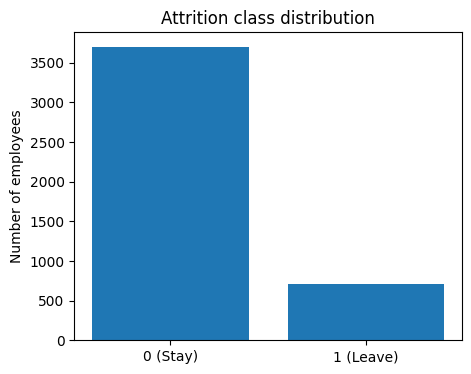

In [ ]:
import matplotlib.pyplot as plt

counts = y.value_counts().sort_index()
pct = (counts / counts.sum() * 100).round(2)

print("Class counts (Attrition):")
print(counts)
print("\nClass percentages (%):")
print(pct)

plt.figure(figsize=(5,4))
plt.bar(["0 (Stay)", "1 (Leave)"], [counts.get(0,0), counts.get(1,0)])
plt.title("Attrition class distribution")
plt.ylabel("Number of employees")
plt.show()


### 4.Build preprocessing (works with mixed types)

Our feature matrix `X` contains both **numerical** and **categorical** variables.
To feed these into most machine learning models, we create a preprocessing pipeline that:

- **Separates columns by type**:
  - `num_cols`: numerical features,
  - `cat_cols`: categorical features.
- **Applies appropriate transformations**:
  - For **numerical features**:
    - Impute missing values with the **median**,
    - Standardize features using `StandardScaler` (zero mean, unit variance).
  - For **categorical features**:
    - Impute missing values with the **most frequent** category,
    - Apply **one-hot encoding** to convert categories into binary indicator variables.

We use a `ColumnTransformer` to apply these pipelines to the correct subsets of columns, and drop any remaining columns.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
], remainder="drop")

preprocess


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Education', 'EmployeeCount', 'JobLevel',
                                  'NumCompaniesWorked', 'PercentSalaryHike',
                                  'StandardHours', 'StockOptionLevel',
                                  'TrainingTimesLastYear',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager', 'JobInvolvement',
                                  'PerformanceRa...
                                  'EnvironmentSatisfaction', 'JobSatisfaction',
                                  'WorkLifeBalance']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'Over18', 'AgeGroup',
                                  'DistanceGroup', 'IncomeGroup', 'TenureGroup',
                                  'ExperienceLevel'])])

### 5. Logistic regression

### Logistic regression reminder

Logistic regression is a statistical technique used to model the probability of a binary event (with two possible outcomes) occurring. Unlike linear regression, which predicts a continuous value, logistic regression predicts the probability of an event occurring.

#### Mathematical formulation

Logistic regression uses the logistic or sigmoid function to transform the output of linear regression into a probability.

The logistic function is defined as follows:
$\sigma(z) = \frac{1}{1 + e^{-z}}$

In logistic regression, \( z \) is a linear combination of the features:
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Where:
- $\beta_0$ is the intercept (y-intercept)
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients of the characteristics $x_1, x_2, \ldots, x_n$.

The probability of the event occurring (for example, \( y = 1 \)) is then given by :
$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

#### Cost function

The cost function used to adjust the logistic regression parameters is the log-likelihood, defined as follows:
$J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $

Where:
- $m$ is the number of samples
- $y^{(i)}$ is the actual value for sample $i$.
- $\hat{y}^{(i)}$ is the predicted probability for sample $i$.

#### Model training

Training the logistic regression model involves finding the $\beta$ parameters that minimize the cost function. This is generally done using the gradient descent algorithm.


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42))
])

log_reg.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Education', 'EmployeeCount',
                                                   'JobLevel',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TrainingTimesLastYear',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   '...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'AgeGroup',
                                                   'DistanceGroup',
                                                   'IncomeGroup', 'TenureGroup',
                                                   'ExperienceLevel'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

### 6. Perceptron

### A reminder of the Perceptron

The perceptron is one of the simplest and oldest supervised classification algorithms, introduced by Frank Rosenblatt in 1957. It is an elementary processing unit of a neural network, often used for binary classification tasks. The perceptron is based on a linear combination of input features and uses a threshold function to produce a binary output.

#### Mathematical formulation

The perceptron calculates a weighted sum of the input features and applies a threshold function to determine the predicted class.

The perceptron output is defined as follows:
$\hat{y} = \begin{cases}
1 & \text{si } z \geq 0
0 & \text{si } z < 0
\end{cases} $

Where:
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Here, $\beta_0$ is the bias (or intercept), and $\beta_1, \beta_2, \ldots, \beta_n$ are the feature weights $x_1, x_2, \ldots, x_n$.

#### Learning algorithm

The perceptron's learning algorithm adjusts weights according to classification errors. For each training sample $(x^{(i)}, y^{(i)})$, where $y^{(i)}$ is the actual class:

1. Calculate the predicted output:
$hat{y}^{(i)} = \begin{cases}
1 & \text{si } z \geq 0
0 & \text{si } z < 0
\end{cases}$

2. Update the weights if the prediction is incorrect:
$\beta_j = \beta_j + \eta (y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$
Where $\eta$ is the learning rate.

#### Cost function

The perceptron does not use a cost function in the traditional sense such as logistic regression. Weights are updated directly according to classification errors.


In [ ]:

from sklearn.linear_model import Perceptron
perceptron = Pipeline([
    ("preprocess", preprocess),
    ("model", Perceptron(random_state=42))
])
perceptron.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Education', 'EmployeeCount',
                                                   'JobLevel',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TrainingTimesLastYear',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   '...
                                                   'WorkLifeBalance']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'AgeGroup',
                                                   'DistanceGroup',
                                                   'IncomeGroup', 'TenureGroup',
                                                   'ExperienceLevel'])])),
                ('model', Perceptron(random_state=42))])

**Question:** According to the results obtained, how does Perceptron differ from logistic regression in its approach to classification?

### 6. Random Forest

### Reminder of Random Forests

Random Forests are a powerful and flexible ensemble method used for classification and regression tasks. They combine several decision trees to improve predictive performance and reduce the risk of overlearning.

#### How it works

A random forest is made up of many independent decision trees, each built on a random sample of the training data and using a random subset of the features for each division of the tree. The predictions of all the trees are then combined to produce a single final prediction.

#### Random Forest construction

1. **Bootstrap sampling**: For each tree in the forest, a random sample with bootstrap replacement of the training data is created. This means that some examples may be selected several times, while others may not be selected at all.
2. **Feature Subset Selection**: At each node of each tree, a random subset of the features is selected. The tree selects the best division from this subset of features.
3. **Tree construction**: Decision trees are built to completion without pruning. This allows each tree to capture complex patterns in the data.
4. **Aggregation of Predictions**: For classification, each tree votes for a class, and the class with the most votes is chosen as the final prediction (majority voting). For regression, the average of all tree predictions is used.

#### Advantages and Disadvantages

##### Advantages :
- **Reduces overlearning**: By combining the predictions of several trees, random forests reduce the risk of overlearning compared with individual decision trees.
- **Robustness**: Insensitive to variations in training data. Random forests are less sensitive to fluctuations in training data.
- **Feature Management**: Able to manage a large number of features and determine the most important ones.
- **Missing Data Handling**: Can handle missing values by imputing values based on forest trees.

##### Disadvantages :
- **Complexity and Computing Time** : Random forests require more computation time and memory than individual decision trees, especially when the number of trees is high.
- **Interpretability**: Less interpretable than individual decision trees, due to the combination of many trees.

#### Applications

- **Classification**: Used for classification tasks in diverse fields such as finance, medicine and marketing.
- **Regression**: Prediction of continuous values in contexts such as real estate price forecasting and sales prediction.
- **Feature Selection**: Identification of the most important features for prediction.

Random forests are a powerful tool for improving the predictive performance and robustness of decision models, by combining the strength of multiple decision trees while mitigating their individual weaknesses.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced_subsample",
        random_state=42
    ))
])

rf.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Education', 'EmployeeCount',
                                                   'JobLevel',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TrainingTimesLastYear',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   '...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'AgeGroup',
                                                   'DistanceGroup',
                                                   'IncomeGroup', 'TenureGroup',
                                                   'ExperienceLevel'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        n_estimators=300, random_state=42))])

## 7. Comparative study of SK-Learn models

## 1. Preparation of learning and test data
We split the dataset into training and test sets using a 70/30 proportion.Stratification on the target ` y `is used to preserve the original class imbalance (same proportion of attrition/no attrition in both sets )


In [ ]:
from sklearn.model_selection import train_test_split

# X, y must already exist:
# X = data.drop(columns=["Attrition","EmployeeID"])
# y = data["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((3087, 27), (1323, 27))

## 2. Show imbalance (counts + % + plot)

- We examine the distribution of the target variable `Attrition` (`0 = Stay`, `1 = Leave`)
using class counts, class percentages, and a bar plot.

Attrition
0    3699
1     711
Name: count, dtype: int64
Attrition
0    83.88
1    16.12
Name: count, dtype: float64


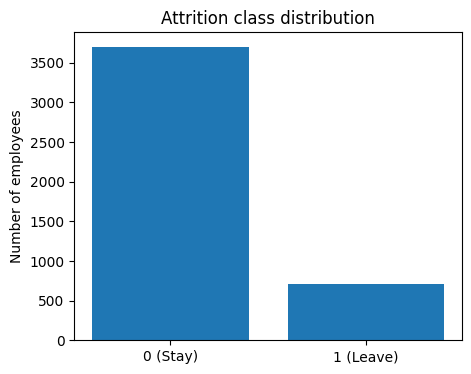

In [ ]:
counts = y.value_counts().sort_index()
pct = (counts / counts.sum() * 100).round(2)

print(counts)
print(pct)

plt.figure(figsize=(5,4))
plt.bar(["0 (Stay)", "1 (Leave)"], [counts.loc[0], counts.loc[1]])
plt.title("Attrition class distribution")
plt.ylabel("Number of employees")
plt.show()


## 3.Build preprocessing (works with mixed types)
- We build a preprocessing pipeline that handles numerical and categorical features differently:
- numerical: median imputation + standardization
- categorical: most frequent imputation + one‑hot encoding

This pipeline will be combined later with our machine learning models.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
], remainder="drop")

preprocess


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Education', 'EmployeeCount', 'JobLevel',
                                  'NumCompaniesWorked', 'PercentSalaryHike',
                                  'StandardHours', 'StockOptionLevel',
                                  'TrainingTimesLastYear',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager', 'JobInvolvement',
                                  'PerformanceRa...
                                  'EnvironmentSatisfaction', 'JobSatisfaction',
                                  'WorkLifeBalance']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'Over18', 'AgeGroup',
                                  'DistanceGroup', 'IncomeGroup', 'TenureGroup',
                                  'ExperienceLevel'])])

## 4.Define models as full pipelines (preprocess + model)

In [ ]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogisticRegression": Pipeline([
        ("preprocess", preprocess),
        ("model", LogisticRegression(max_iter=2000, random_state=42, class_weight="balanced"))
    ]),
    "Perceptron": Pipeline([
        ("preprocess", preprocess),
        ("model", Perceptron(random_state=42))
    ]),
    "RandomForest": Pipeline([
        ("preprocess", preprocess),
        ("model", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            class_weight="balanced_subsample",
            n_jobs=-1
        ))
    ])
}


## 5. Train models and compute predictions/scores

In [ ]:
def get_score(pipeline, X_):
    """
    Returns continuous scores for ROC/PR:
    - predict_proba[:,1] if available
    - else decision_function if available
    - else None
    """
    if hasattr(pipeline, "predict_proba"):
        return pipeline.predict_proba(X_)[:, 1]
    if hasattr(pipeline, "decision_function"):
        return pipeline.decision_function(X_)
    return None

predictions = {}
scores = {}

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    predictions[name] = pipe.predict(X_test)
    scores[name] = get_score(pipe, X_test)

list(predictions.keys()), {k: (None if v is None else "ok") for k,v in scores.items()}


(['LogisticRegression', 'Perceptron', 'RandomForest'],
 {'LogisticRegression': 'ok', 'Perceptron': 'ok', 'RandomForest': 'ok'})

## 6.Fit + predict + get continuous scores (ROC/PR)
- We now fit each pipeline on the training data, obtain:
- **hard predictions** (`predict`) for confusion matrices and basic metrics,
- **continuous scores** (probabilities or decision function) for ROC and PR curves.

In [ ]:
def get_score(pipeline, X_):
    """
    Returns continuous scores for ROC/PR:
    - predict_proba[:,1] if available
    - else decision_function if available
    - else None
    """
    if hasattr(pipeline, "predict_proba"):
        return pipeline.predict_proba(X_)[:, 1]
    if hasattr(pipeline, "decision_function"):
        return pipeline.decision_function(X_)
    return None

predictions = {}
scores = {}

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    predictions[name] = pipe.predict(X_test)
    scores[name] = get_score(pipe, X_test)

list(predictions.keys()), {k: (None if v is None else "ok") for k,v in scores.items()}


(['LogisticRegression', 'Perceptron', 'RandomForest'],
 {'LogisticRegression': 'ok', 'Perceptron': 'ok', 'RandomForest': 'ok'})

## 7. Compute evaluation metrics and build `results` dictionary

We now compute, for each model:
- the **confusion matrix**,
- **Accuracy** and **Balanced Accuracy**,
- **Precision**, **Recall**, and **F1-score** for the positive class (Attrition = 1),
- **ROC AUC** and **PR AUC** (if continuous scores are available).

All metrics are stored in a single `results` dictionary for easy comparison.

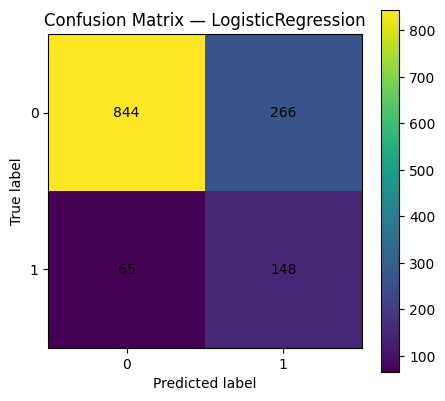

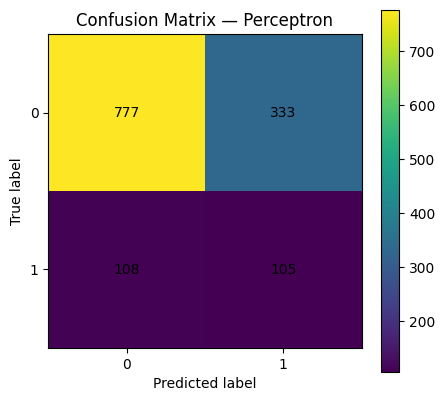

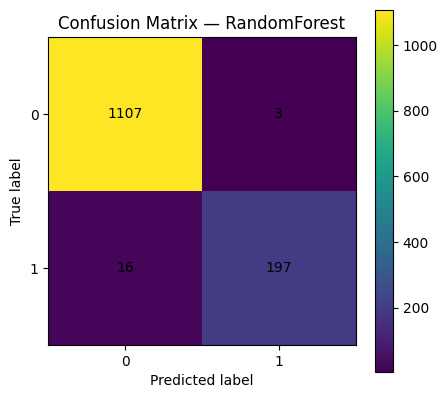

In [ ]:
# ================================
# 1) Build `results` (required)
# ================================

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)
import numpy as np

def build_results(y_test, predictions, scores):
    results = {}
    for name in predictions.keys():
        y_pred = predictions[name]
        y_score = scores.get(name, None)
        
        cm = confusion_matrix(y_test, y_pred)

        acc = accuracy_score(y_test, y_pred)
        bacc = balanced_accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
        rec  = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        f1v  = f1_score(y_test, y_pred, pos_label=1, zero_division=0)

        roc_auc = np.nan
        pr_auc = np.nan
        if y_score is not None:
            roc_auc = roc_auc_score(y_test, y_score)
            pr_auc  = average_precision_score(y_test, y_score)

        results[name] = {
            "confusion_matrix": cm,
            "Accuracy": acc,
            "BalancedAcc": bacc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1v,
            "ROC_AUC": roc_auc,
            "PR_AUC": pr_auc
        }
    return results

results = build_results(y_test, predictions, scores)

# ================================
# 2) Plot confusion matrices
# ================================
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4.6, 4.2))
    plt.imshow(cm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ["0", "1"])
    plt.yticks(tick_marks, ["0", "1"])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

for name, r in results.items():
    plot_confusion_matrix(r["confusion_matrix"], f"Confusion Matrix — {name}")


## 8. Plot ROC and Precision–Recall curves

Using the continuous scores (`scores`) computed earlier, we now:
- plot the **ROC curve** (TPR vs FPR) for each model and display its **AUC**,
- plot the **Precision–Recall curve** for each model and display its **Average Precision (AP)**.

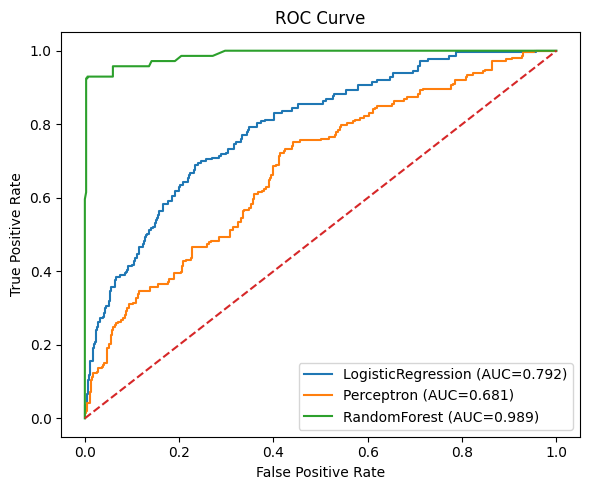

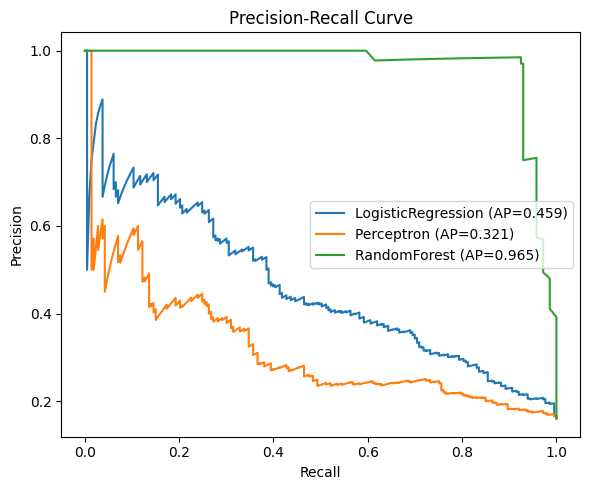

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC
plt.figure(figsize=(6,5))
for name in models.keys():
    y_score = scores[name]
    if y_score is None:
        continue
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# PR
plt.figure(figsize=(6,5))
for name in models.keys():
    y_score = scores[name]
    if y_score is None:
        continue
    prec, rec, _ = precision_recall_curve(y_test, y_score)
    ap = average_precision_score(y_test, y_score)
    plt.plot(rec, prec, label=f"{name} (AP={ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.tight_layout()
plt.show()


## 9. Metrics table (model comparison)

We build a single table to compare models on the same test set.
For imbalanced attrition, prioritize:
- Recall (class 1) and F1 (class 1)
- Balanced Accuracy
- PR-AUC (Average Precision)
ROC-AUC is also reported when probability/decision scores are available.


In [ ]:
import pandas as pd
import numpy as np

rows = []

for name, r in results.items():
    rows.append({
        "Model": name,
        "Accuracy": r.get("Accuracy", np.nan),
        "BalancedAccuracy": r.get("BalancedAcc", np.nan),
        "Precision(1)": r.get("Precision", np.nan),
        "Recall(1)": r.get("Recall", np.nan),
        "F1(1)": r.get("F1", np.nan),
        "ROC_AUC": r.get("ROC_AUC", np.nan),
        "PR_AUC": r.get("PR_AUC", np.nan)
    })

metrics_table = pd.DataFrame(rows)

metrics_table


Model  Accuracy  BalancedAccuracy  Precision(1)  Recall(1)  \
0  LogisticRegression  0.749811          0.727598      0.357488   0.694836   
1          Perceptron  0.666667          0.596479      0.239726   0.492958   
2        RandomForest  0.985639          0.961090      0.985000   0.924883   

      F1(1)   ROC_AUC    PR_AUC  
0  0.472089  0.791672  0.459490  
1  0.322581  0.681153  0.320786  
2  0.953995  0.988694  0.965025

## 10. Cross-Validation

**Principle of Cross-Validation:**
Cross-validation is a statistical method used to estimate the performance of a model on unseen data. It addresses the limitation of a single train-test split, which can be sensitive to how the data is partitioned.

In **k-fold cross-validation**, the dataset is divided into *k* subsets (folds). The model is trained *k* times, each time using *k-1* folds for training and the remaining fold for validation. The final performance metric is the average of the results from all *k* trials. This provides a more robust and reliable estimate of the model"s generalization ability.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results_non_ethical = {}
print("Evaluating models using 5-fold cross-validation (Accuracy):")
for name, model in models.items():
    # Using the training set for cross-validation to assess stability
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std() * 2
    cv_results_non_ethical[name] = f"{cv_mean:.4f} (+/- {cv_std:.4f})"
    print(f"{name:20}: {cv_mean:.4f} (+/- {cv_std:.4f})")

Evaluating models using 5-fold cross-validation (Accuracy):
LogisticRegression  : 0.7256 (+/- 0.0173)
Perceptron          : 0.7898 (+/- 0.0721)
RandomForest        : 0.9702 (+/- 0.0136)


## 11. Feature Importance

**Principle of Feature Importance:**
Feature importance refers to techniques that assign scores to input features based on their contribution to the model"s predictive performance. Understanding feature importance is crucial for:
- **Model Interpretability:** Identifying which factors (e.g., salary, work-life balance, distance from home) most heavily influence model predictions.
- **Feature Selection:** Identifying and potentially removing irrelevant or redundant features to simplify the model and improve performance.
- **Business Insights:** Providing actionable insights to stakeholders about the primary drivers of the target outcome (employee attrition).

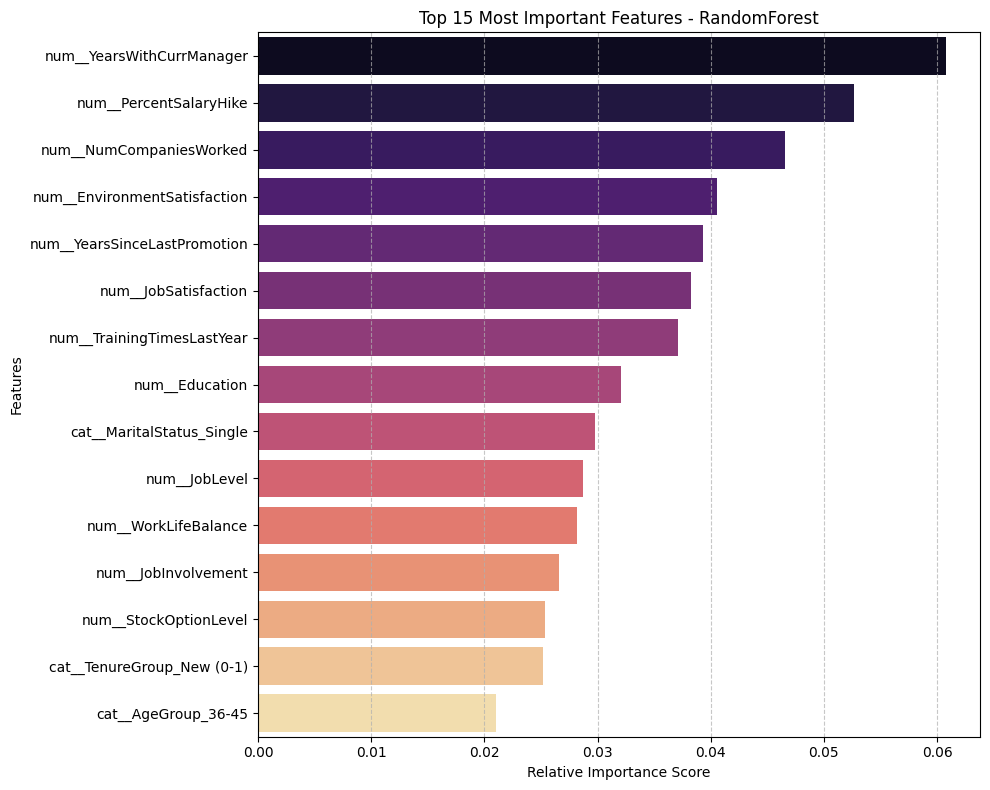

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# We use the RandomForest model as it provides reliable native feature importance scores
if "RandomForest" in models:
    rf_pipeline = models["RandomForest"]
    # Ensure the model is fitted (it should be from previous steps)
    rf_model = rf_pipeline.named_steps["model"]
    preprocessor = rf_pipeline.named_steps["preprocess"]

    # Get feature names from the preprocessor
    # This requires scikit-learn >= 1.0
    try:
        feature_names = preprocessor.get_feature_names_out()
    except:
        # Fallback if get_feature_names_out is not available
        feature_names = [f"feature_{i}" for i in range(len(rf_model.feature_importances_))]

    # Get importance values
    importances = rf_model.feature_importances_

    # Create a DataFrame for sorting and plotting
    feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
    feat_df = feat_df.sort_values(by="Importance", ascending=False).head(15)

    # Plotting
    plt.figure(figsize=(10, 8))
    sns.barplot(x="Importance", y="Feature", data=feat_df, hue="Feature", palette="magma", legend=False)
    plt.title("Top 15 Most Important Features - RandomForest")
    plt.xlabel("Relative Importance Score")
    plt.ylabel("Features")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("RandomForest model not found in the models dictionary.")
## -----------------------------------------------------------------------------------

##  Ethical feature selection

Based on ethical analysis and responsible AI principles, we remove features that may introduce
discrimination, bias, or that have no causal relevance to employee attrition.

### Removed features and justification

- **Gender** → risk of gender discrimination
- **MaritalStatus** → private life attribute, not job-related
- **EducationField** → indirect socio-economic bias
- **Age** → age discrimination risk
- **EmployeeID** → identifier, no predictive value
- **Over18** → constant value, no information
- **StandardHours** → constant value
- **EmployeeCount** → constant value

These features are excluded before model training to ensure fairness, transparency,
and compliance with ethical AI guidelines.


In [ ]:
# ================================
# Ethical feature removal
# ================================

features_to_drop = [
    "Gender",
    "MaritalStatus",
    "EducationField",
    "AgeGroup",
    "DistanceGroup",
    "IncomeGroup",
    "TenureGroup",
    "ExperienceLevel",
    "EmployeeID",
    "Over18",
    "StandardHours",
    "EmployeeCount"
]

X_ethic = data.drop(columns=["Attrition"] + features_to_drop)
y_ethic = data["Attrition"].astype(str).str.strip().map({"No": 0, "Yes": 1}).astype(int)

X_ethic.shape, y_ethic.shape


((4410, 21), (4410,))

## Preprocessing after ethical filtering

After removing sensitive and non-informative features, we rebuild the preprocessing pipeline:

- Numerical features → median imputation + standardization
- Categorical features → most frequent imputation + one-hot encoding

This ensures consistency and prevents data leakage.


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

cat_cols = X_ethic.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X_ethic.columns if c not in cat_cols]

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_ethic = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])


## 8. Model training with ethically filtered features

We retrain the same models using the ethically filtered dataset:

- Logistic Regression (baseline, interpretable)
- Perceptron (linear classifier)
- Random Forest (non-linear, high performance)

This allows a direct comparison with previous results.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_ethic,
    y_ethic,
    test_size=0.30,
    random_state=42,
    stratify=y_ethic
)


In [ ]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier

models_ethic = {
    "LogisticRegression": Pipeline([
        ("preprocess", preprocess_ethic),
        ("model", LogisticRegression(
            max_iter=2000,
            random_state=42,
            class_weight="balanced"
        ))
    ]),
    "Perceptron": Pipeline([
        ("preprocess", preprocess_ethic),
        ("model", Perceptron(random_state=42))
    ]),
    "RandomForest": Pipeline([
        ("preprocess", preprocess_ethic),
        ("model", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            class_weight="balanced_subsample",
            n_jobs=-1
        ))
    ])
}


In [ ]:
def get_score(pipeline, X_):
    if hasattr(pipeline, "predict_proba"):
        return pipeline.predict_proba(X_)[:, 1]
    if hasattr(pipeline, "decision_function"):
        return pipeline.decision_function(X_)
    return None

predictions_ethic = {}
scores_ethic = {}

for name, pipe in models_ethic.items():
    pipe.fit(X_train, y_train)
    predictions_ethic[name] = pipe.predict(X_test)
    scores_ethic[name] = get_score(pipe, X_test)


## Performance evaluation after ethical feature removal

We evaluate the models using metrics adapted to class imbalance:

- Accuracy
- Balanced Accuracy
- Precision / Recall / F1 (Attrition = 1)
- ROC-AUC
- PR-AUC (Average Precision)

This allows us to assess the impact of ethical constraints on performance.


In [ ]:
# ================================
# 1) Build results_ethic (metrics)
# ================================

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)

def build_results(y_true, predictions, scores):
    results = {}
    for name in predictions.keys():
        y_pred = predictions[name]
        y_score = scores.get(name, None)

        cm = confusion_matrix(y_true, y_pred)

        acc = accuracy_score(y_true, y_pred)
        bacc = balanced_accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
        rec  = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
        f1v  = f1_score(y_true, y_pred, pos_label=1, zero_division=0)

        roc_auc = np.nan
        pr_auc  = np.nan
        if y_score is not None:
            roc_auc = roc_auc_score(y_true, y_score)
            pr_auc  = average_precision_score(y_true, y_score)

        results[name] = {
            "confusion_matrix": cm,
            "Accuracy": acc,
            "BalancedAcc": bacc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1v,
            "ROC_AUC": roc_auc,
            "PR_AUC": pr_auc
        }
    return results

results_ethic = build_results(y_test, predictions_ethic, scores_ethic)

list(results_ethic.keys())


['LogisticRegression', 'Perceptron', 'RandomForest']

## Confusion matrix display (ethical models)

We display confusion matrices for each ethical model to observe:
- False Positives (FP)
- False Negatives (FN)
- True Positives (TP)
- True Negatives (TN)


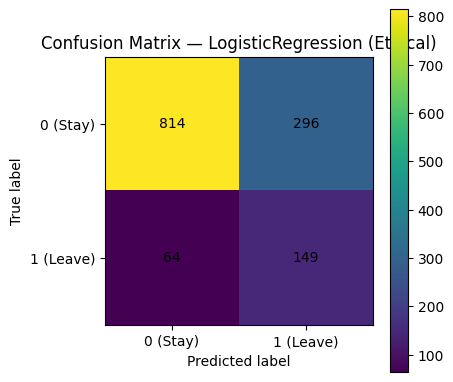

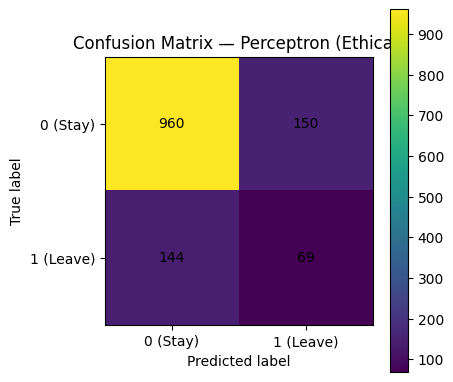

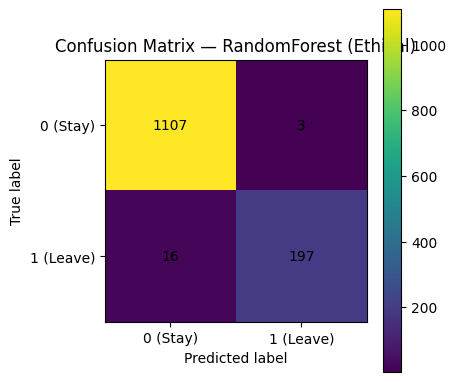

In [ ]:
# ================================
# 2) Confusion matrices (ethical)
# ================================
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4.6, 4.2))
    plt.imshow(cm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ["0 (Stay)", "1 (Leave)"])
    plt.yticks(tick_marks, ["0 (Stay)", "1 (Leave)"])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

for name, r in results_ethic.items():
    plot_confusion_matrix(r["confusion_matrix"], f"Confusion Matrix — {name} (Ethical)")


## ROC and Precision-Recall curves (ethical models)

We plot:
- ROC curves (with ROC-AUC)
- Precision-Recall curves (with PR-AUC / Average Precision)

PR curves are recommended for imbalanced classification.


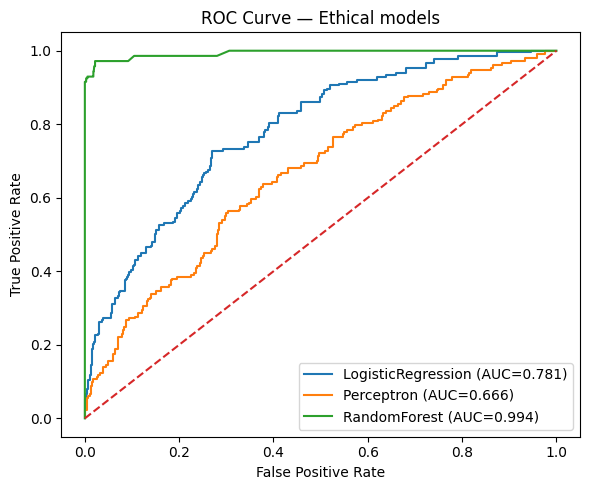

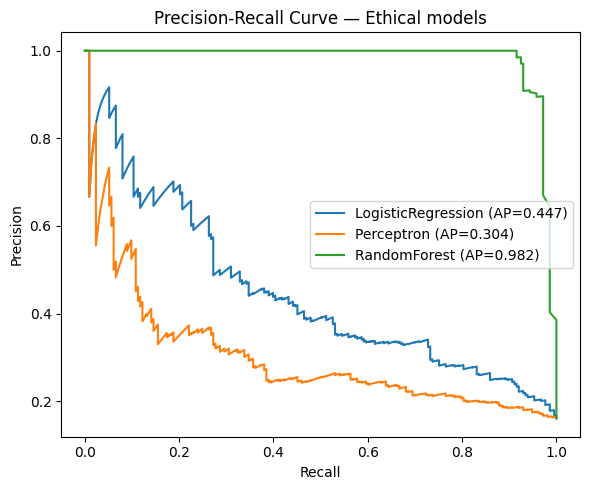

In [ ]:
# ================================
# 3) ROC + PR curves (ethical)
# ================================
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC
plt.figure(figsize=(6,5))
for name in models_ethic.keys():
    y_score = scores_ethic.get(name, None)
    if y_score is None:
        continue
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Ethical models")
plt.legend()
plt.tight_layout()
plt.show()

# PR
plt.figure(figsize=(6,5))
for name in models_ethic.keys():
    y_score = scores_ethic.get(name, None)
    if y_score is None:
        continue
    prec, rec, _ = precision_recall_curve(y_test, y_score)
    ap = average_precision_score(y_test, y_score)
    plt.plot(rec, prec, label=f"{name} (AP={ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve — Ethical models")
plt.legend()
plt.tight_layout()
plt.show()


## Metrics table (ethical models)

We aggregate metrics into a single table and sort by PR-AUC (recommended for imbalance).


In [ ]:
# ================================
# 4) Metrics table (ethical)
# ================================
import pandas as pd

rows = []
for name, r in results_ethic.items():
    rows.append({
        "Model": name,
        "Accuracy": r["Accuracy"],
        "BalancedAccuracy": r["BalancedAcc"],
        "Precision(1)": r["Precision"],
        "Recall(1)": r["Recall"],
        "F1(1)": r["F1"],
        "ROC_AUC": r["ROC_AUC"],
        "PR_AUC": r["PR_AUC"]
    })

metrics_table_ethic = pd.DataFrame(rows).sort_values(by="PR_AUC", ascending=False)
metrics_table_ethic


Model  Accuracy  BalancedAccuracy  Precision(1)  Recall(1)  \
2        RandomForest  0.985639          0.961090      0.985000   0.924883   
0  LogisticRegression  0.727891          0.716432      0.334831   0.699531   
1          Perceptron  0.777778          0.594404      0.315068   0.323944   

      F1(1)   ROC_AUC    PR_AUC  
2  0.953995  0.993605  0.981941  
0  0.452888  0.780870  0.446548  
1  0.319444  0.665537  0.303739

## Cross-Validation (Ethical Models)

**Principle of Cross-Validation:**
Cross-validation is a statistical method used to estimate the performance of a model on unseen data. It addresses the limitation of a single train-test split, which can be sensitive to how the data is partitioned.

In **k-fold cross-validation**, the dataset is divided into *k* subsets (folds). The model is trained *k* times, each time using *k-1* folds for training and the remaining fold for validation. The final performance metric is the average of the results from all *k* trials. This provides a more robust and reliable estimate of the model's generalization ability.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results_ethical = {}
print("Evaluating ethical models using 5-fold cross-validation (Accuracy):")
for name, model in models_ethic.items():
    # Using the training set for cross-validation to assess stability
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std() * 2
    cv_results_ethical[name] = f"{cv_mean:.4f} (+/- {cv_std:.4f})"
    print(f"{name:20}: {cv_mean:.4f} (+/- {cv_std:.4f})")

Evaluating ethical models using 5-fold cross-validation (Accuracy):
LogisticRegression  : 0.7123 (+/- 0.0176)
Perceptron          : 0.7668 (+/- 0.0763)
RandomForest        : 0.9712 (+/- 0.0139)


## Feature Importance (Ethical Models)

**Principle of Feature Importance:**
Feature importance refers to techniques that assign scores to input features based on their contribution to the model's predictive performance. Understanding feature importance is crucial for:
- **Model Interpretability:** Identifying which factors (e.g., salary, work-life balance, distance from home) most heavily influence model predictions.
- **Feature Selection:** Identifying and potentially removing irrelevant or redundant features to simplify the model and improve performance.
- **Business Insights:** Providing actionable insights to stakeholders about the primary drivers of the target outcome (employee attrition).

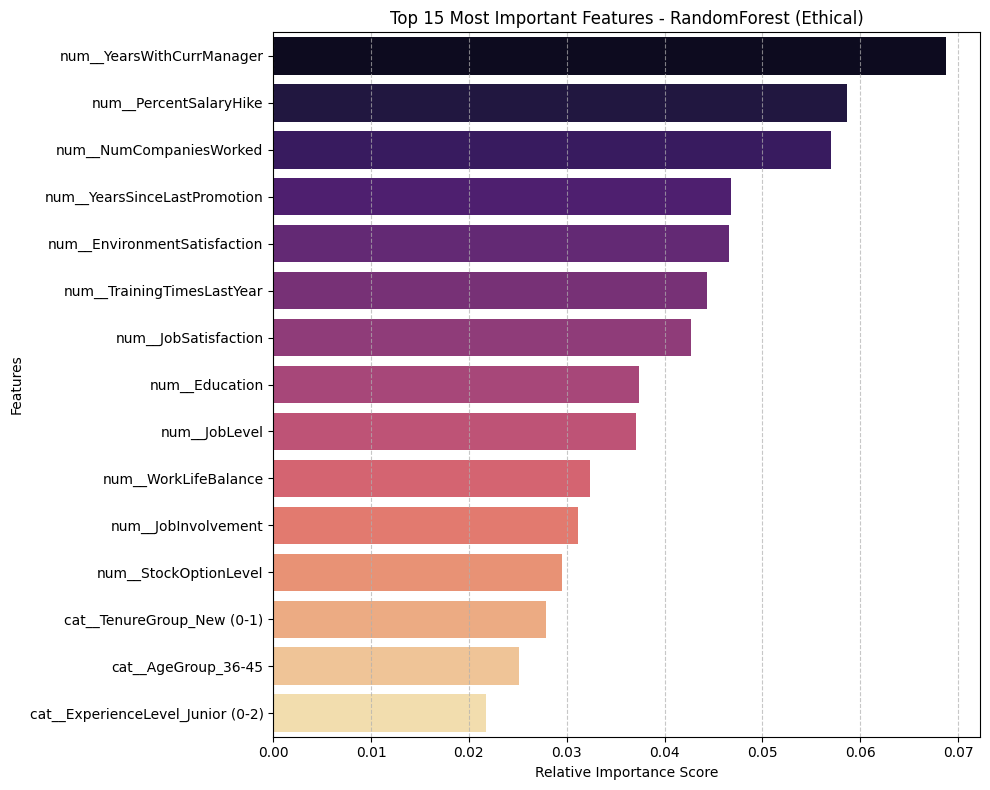

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# We use the RandomForest model as it provides reliable native feature importance scores
if "RandomForest" in models_ethic:
    rf_pipeline = models_ethic["RandomForest"]
    # Ensure the model is fitted (it should be from previous steps)
    rf_model = rf_pipeline.named_steps["model"]
    preprocessor = rf_pipeline.named_steps["preprocess"]

    # Get feature names from the preprocessor
    # This requires scikit-learn >= 1.0
    try:
        feature_names = preprocessor.get_feature_names_out()
    except:
        # Fallback if get_feature_names_out is not available
        feature_names = [f"feature_{i}" for i in range(len(rf_model.feature_importances_))]

    # Get importance values
    importances = rf_model.feature_importances_

    # Create a DataFrame for sorting and plotting
    feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
    feat_df = feat_df.sort_values(by="Importance", ascending=False).head(15)

    # Plotting with the same fancy style as non-ethical
    plt.figure(figsize=(10, 8))
    sns.barplot(x="Importance", y="Feature", data=feat_df, hue="Feature", palette="magma", legend=False)
    plt.title("Top 15 Most Important Features - RandomForest (Ethical)")
    plt.xlabel("Relative Importance Score")
    plt.ylabel("Features")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("RandomForest model not found in the ethical models dictionary.")
## -----------------------------------------------------------------------------------

## 10. Final comparison: ethical vs non-ethical

We combine:
- `metrics_table` (non-ethical baseline)
- `metrics_table_ethic` (ethical filtered features)
- Cross-validation results from both approaches

and compare them in a restructured table with ethical/non-ethical side by side.


In [ ]:
# Model full names
names = {
    "LogisticRegression": "Logistic Regression",
    "Perceptron": "Perceptron",
    "RandomForest": "Random Forest"
}

# Metrics to show (in desired order)
metrics_order = [
    "PR AUC",
    "ROC AUC",
    "Recall (class 1)",
    "F1-score (class 1)",
    "Precision (class 1)",
    "Balanced Accuracy",
    "Accuracy"
]

# Build table: rows = metrics, columns = model (Full / Ethical)
data = {}
for short, full in names.items():
    # Non-ethical
    r = results[short]
    data[f"{full} (Full)"] = {
        "Accuracy":           round(r["Accuracy"], 3),
        "Balanced Accuracy":  round(r["BalancedAcc"], 3),
        "Precision (class 1)": round(r["Precision"], 3),
        "Recall (class 1)":    round(r["Recall"], 3),
        "F1-score (class 1)":  round(r["F1"], 3),
        "ROC AUC":             round(r["ROC_AUC"], 3) if not np.isnan(r["ROC_AUC"]) else "—",
        "PR AUC":              round(r["PR_AUC"], 3) if not np.isnan(r["PR_AUC"]) else "—",
    }
    # Ethical
    r_eth = results_ethic[short]
    data[f"{full} (Ethical)"] = {
        "Accuracy":           round(r_eth["Accuracy"], 3),
        "Balanced Accuracy":  round(r_eth["BalancedAcc"], 3),
        "Precision (class 1)": round(r_eth["Precision"], 3),
        "Recall (class 1)":    round(r_eth["Recall"], 3),
        "F1-score (class 1)":  round(r_eth["F1"], 3),
        "ROC AUC":             round(r_eth["ROC_AUC"], 3) if not np.isnan(r_eth["ROC_AUC"]) else "—",
        "PR AUC":              round(r_eth["PR_AUC"], 3) if not np.isnan(r_eth["PR_AUC"]) else "—",
    }

# Create DataFrame and transpose
df = pd.DataFrame(data).T
comparison = df[metrics_order].T  # Transpose: metrics as rows

print("=== Final Comparison: Full vs Ethical Features ===\n")
display(comparison)

# ================================
# 6) Top 15 Features Comparison Table
# ================================

print("\n\n=== Top 15 Features Comparison ===")
print("\nComparing the most important features from RandomForest models:\n")

# Extract feature importance from non-ethical RandomForest
if "RandomForest" in models:
    rf_pipeline_non_eth = models["RandomForest"]
    rf_model_non_eth = rf_pipeline_non_eth.named_steps["model"]
    preprocessor_non_eth = rf_pipeline_non_eth.named_steps["preprocess"]

    try:
        feature_names_non_eth = preprocessor_non_eth.get_feature_names_out()
    except:
        feature_names_non_eth = [f"feature_{i}" for i in range(len(rf_model_non_eth.feature_importances_))]

    importances_non_eth = rf_model_non_eth.feature_importances_
    feat_df_non_eth = pd.DataFrame({"Feature": feature_names_non_eth, "Importance": importances_non_eth})
    feat_df_non_eth = feat_df_non_eth.sort_values(by="Importance", ascending=False).head(15)
    feat_df_non_eth = feat_df_non_eth.reset_index(drop=True)
    feat_df_non_eth.index = feat_df_non_eth.index + 1  # Start ranking from 1
    feat_df_non_eth.columns = ["Feature (Non-Ethical)", "Importance (Non-Ethical)"]
else:
    feat_df_non_eth = pd.DataFrame({"Feature (Non-Ethical)": ["N/A"], "Importance (Non-Ethical)": [0]})

# Extract feature importance from ethical RandomForest
if "RandomForest" in models_ethic:
    rf_pipeline_eth = models_ethic["RandomForest"]
    rf_model_eth = rf_pipeline_eth.named_steps["model"]
    preprocessor_eth = rf_pipeline_eth.named_steps["preprocess"]

    try:
        feature_names_eth = preprocessor_eth.get_feature_names_out()
    except:
        feature_names_eth = [f"feature_{i}" for i in range(len(rf_model_eth.feature_importances_))]

    importances_eth = rf_model_eth.feature_importances_
    feat_df_eth = pd.DataFrame({"Feature": feature_names_eth, "Importance": importances_eth})
    feat_df_eth = feat_df_eth.sort_values(by="Importance", ascending=False).head(15)
    feat_df_eth = feat_df_eth.reset_index(drop=True)
    feat_df_eth.index = feat_df_eth.index + 1  # Start ranking from 1
    feat_df_eth.columns = ["Feature (Ethical)", "Importance (Ethical)"]
else:
    feat_df_eth = pd.DataFrame({"Feature (Ethical)": ["N/A"], "Importance (Ethical)": [0]})

# Combine both dataframes side-by-side
features_comparison = pd.concat([feat_df_non_eth, feat_df_eth], axis=1)

# Display the comparison table
display(features_comparison)

=== Final Comparison: Full vs Ethical Features ===



Logistic Regression (Full)  \
PR AUC                                    0.459   
ROC AUC                                   0.792   
Recall (class 1)                          0.695   
F1-score (class 1)                        0.472   
Precision (class 1)                       0.357   
Balanced Accuracy                         0.728   
Accuracy                                  0.750   

                     Logistic Regression (Ethical)  Perceptron (Full)  \
PR AUC                                       0.447              0.321   
ROC AUC                                      0.781              0.681   
Recall (class 1)                             0.700              0.493   
F1-score (class 1)                           0.453              0.323   
Precision (class 1)                          0.335              0.240   
Balanced Accuracy                            0.716              0.596   
Accuracy                                     0.728              0.667   

                     Perceptron (Ethical)  Random Forest (Full)  \
PR AUC                              0.304                 0.965   
ROC AUC                             0.666                 0.989   
Recall (class 1)                    0.324                 0.925   
F1-score (class 1)                  0.319                 0.954   
Precision (class 1)                 0.315                 0.985   
Balanced Accuracy                   0.594                 0.961   
Accuracy                            0.778                 0.986   

                     Random Forest (Ethical)  
PR AUC                                 0.982  
ROC AUC                                0.994  
Recall (class 1)                       0.925  
F1-score (class 1)                     0.954  
Precision (class 1)                    0.985  
Balanced Accuracy                      0.961  
Accuracy                               0.986



=== Top 15 Features Comparison ===

Comparing the most important features from RandomForest models:



Feature (Non-Ethical)  Importance (Non-Ethical)  \
1      num__YearsWithCurrManager                  0.060754   
2         num__PercentSalaryHike                  0.052625   
3        num__NumCompaniesWorked                  0.046561   
4   num__EnvironmentSatisfaction                  0.040532   
5   num__YearsSinceLastPromotion                  0.039302   
6           num__JobSatisfaction                  0.038220   
7     num__TrainingTimesLastYear                  0.037076   
8                 num__Education                  0.032078   
9      cat__MaritalStatus_Single                  0.029769   
10                 num__JobLevel                  0.028753   
11          num__WorkLifeBalance                  0.028148   
12           num__JobInvolvement                  0.026576   
13         num__StockOptionLevel                  0.025398   
14    cat__TenureGroup_New (0-1)                  0.025196   
15           cat__AgeGroup_36-45                  0.021065   

                    Feature (Ethical)  Importance (Ethical)  
1           num__YearsWithCurrManager              0.068814  
2              num__PercentSalaryHike              0.058637  
3             num__NumCompaniesWorked              0.057065  
4        num__YearsSinceLastPromotion              0.046753  
5        num__EnvironmentSatisfaction              0.046566  
6          num__TrainingTimesLastYear              0.044297  
7                num__JobSatisfaction              0.042679  
8                      num__Education              0.037367  
9                       num__JobLevel              0.037097  
10               num__WorkLifeBalance              0.032343  
11                num__JobInvolvement              0.031135  
12              num__StockOptionLevel              0.029481  
13         cat__TenureGroup_New (0-1)              0.027906  
14                cat__AgeGroup_36-45              0.025156  
15  cat__ExperienceLevel_Junior (0-2)              0.021745

In [ ]:
# Create a dataframe to compare CV results
cv_comparison_df = pd.DataFrame({
    "Model": list(cv_results_non_ethical.keys()),
    "Cross-Validation (Non-Ethical)": list(cv_results_non_ethical.values()),
    "Cross-Validation (Ethical)": [cv_results_ethical.get(m, "N/A") for m in cv_results_non_ethical.keys()]
})

print("\n=== Cross-Validation Comparison ===")
display(cv_comparison_df)


=== Cross-Validation Comparison ===


Model Cross-Validation (Non-Ethical)  \
0  LogisticRegression            0.7256 (+/- 0.0173)   
1          Perceptron            0.7898 (+/- 0.0721)   
2        RandomForest            0.9702 (+/- 0.0136)   

  Cross-Validation (Ethical)  
0        0.7123 (+/- 0.0176)  
1        0.7668 (+/- 0.0763)  
2        0.9712 (+/- 0.0139)